In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import pickle
import yaml

import pipeline.pipeline_tools as pt
import pipeline.Models as md

%load_ext autoreload
%autoreload 2

In [2]:
with open("/share/rcifdata/tmadula/data/UKAEA/baselines/regressors/random_efiitg_gb_regressor_losses_5K.pkl", "rb") as f:
    baseline_50K = pickle.load(f)

In [3]:
with open("/share/rcifdata/tmadula/data/UKAEA/baselines/regressors/random_efiitg_gb_regressor_losses_30000K.pkl", "rb") as f:
    baseline_30K = pickle.load(f)

In [4]:
base_30 = baseline_30K['test_losses']
base_50 = baseline_50K['test_losses']

In [5]:
dict_list = []

for i in range(20):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/fast_full/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_list.append(pickle.load(f))

In [6]:
dict_list[0].keys()

dict_keys(['train_losses', 'valid_losses', 'test_losses', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

In [19]:
train_losses_nested = dict_list[19]["train_losses"]

In [20]:
train_losses = [loss for losslist in train_losses_nested for loss in losslist]
iter_length = [len(losslist) for losslist in train_losses_nested]

loss_max = [max(losslist) for losslist in train_losses_nested]
loss_min = [min(losslist) for losslist in train_losses_nested]
loss_mean = [sum(losslist) / len(losslist) for losslist in train_losses_nested]

In [21]:
test_loss_mess = dict_list[19]["test_losses"]
print(len(test_loss_mess))

test_loss_mess_0 = test_loss_mess[1:] # remove initial test loss
test_loss = test_loss_mess_0[1::2]

test_losses = [loss for losslist in test_loss for loss in losslist]
iter_length_test = [len(losslist) for losslist in test_loss]

41


In [22]:
n_points = dict_list[19]["n_train_points"]

Text(0, 0.5, 'Number of Training Points')

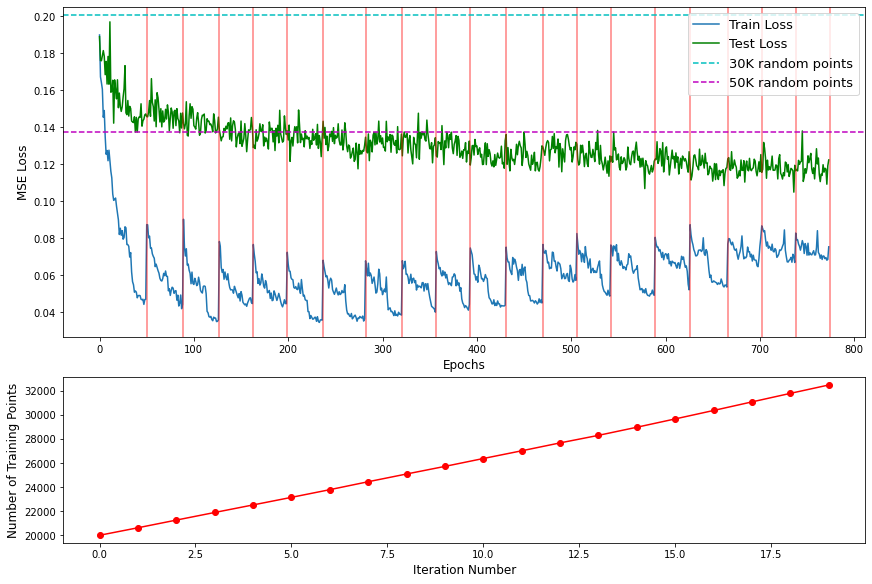

In [27]:
line_pos = np.cumsum(iter_length)

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_losses, label = "Train Loss")
ax_dict["A"].plot(test_losses, color = "green", label = "Test Loss")

for xc in line_pos:
    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)

ax_dict["A"].axhline(base_30, linestyle = 'dashed', label = "30K random points", color = "c")
ax_dict["A"].axhline(base_50, linestyle = 'dashed', label = "50K random points", color = "m")

ax_dict["A"].legend(fontsize = 13)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

Text(0, 0.5, 'MSE Loss')

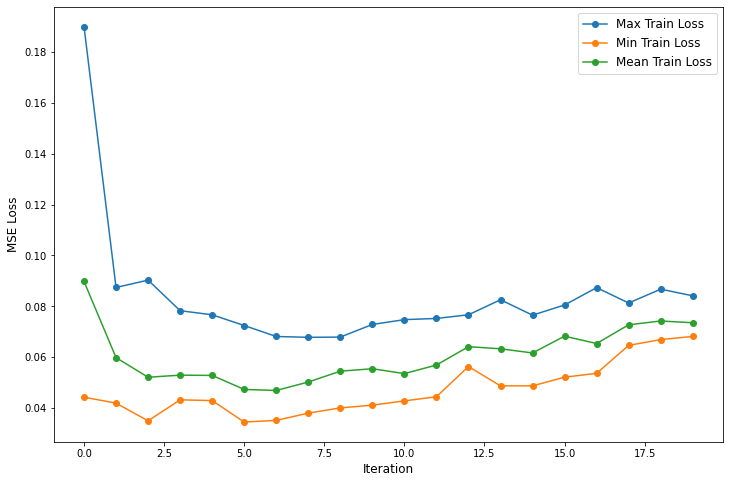

In [199]:
plt.figure(figsize = (12,8))

plt.plot(loss_max, "o-", label = "Max Train Loss")
plt.plot(loss_min, "o-", label = "Min Train Loss")
plt.plot(loss_mean, "o-", label = "Mean Train Loss")

plt.legend(fontsize = 12)
plt.xlabel("Iteration", fontsize = 12)
plt.ylabel("MSE Loss", fontsize = 12)

### 100 iteration run

Dictionary structure fixed for this run - or not!

In [29]:
dict_list_100 = []

for i in range(100):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/iterations_100/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_list_100.append(pickle.load(f))

In [30]:
dict_list_100[99].keys()

dict_keys(['train_loss_init', 'test_loss_init', 'retrain_losses', 'retrain_test_losses', 'post_test_loss', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

In [32]:
len(dict_list_100[99]["class_missed_loss"])

9

In [18]:
train_losses = dict_list_100[99]["retrain_losses"]
test_losses = dict_list_100[99]["retrain_test_losses"]
n_points = dict_list_100[99]["n_train_points"]

train_loss = [loss for losslist in train_losses for loss in losslist]
test_loss = [loss for losslist in test_losses for loss in losslist]

iter_length = [len(losslist) for losslist in train_losses]

line_pos = np.cumsum(iter_length)

Text(0, 0.5, 'Number of Training Points')

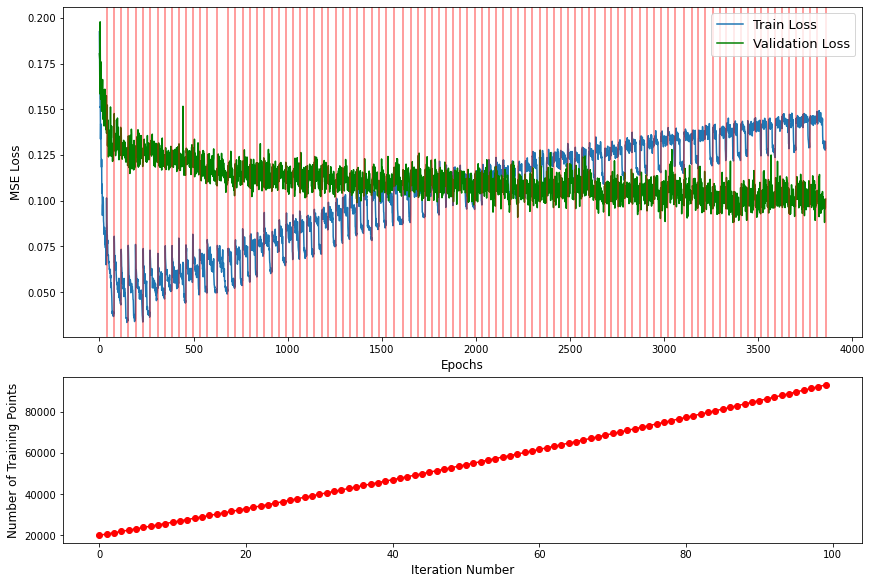

In [20]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_loss, label = "Train Loss")
ax_dict["A"].plot(test_loss, color = "green", label = "Validation Loss")

for xc in line_pos:
    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)

ax_dict["A"].legend(fontsize = 13)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

Text(0, 0.5, 'Test MSE Loss')

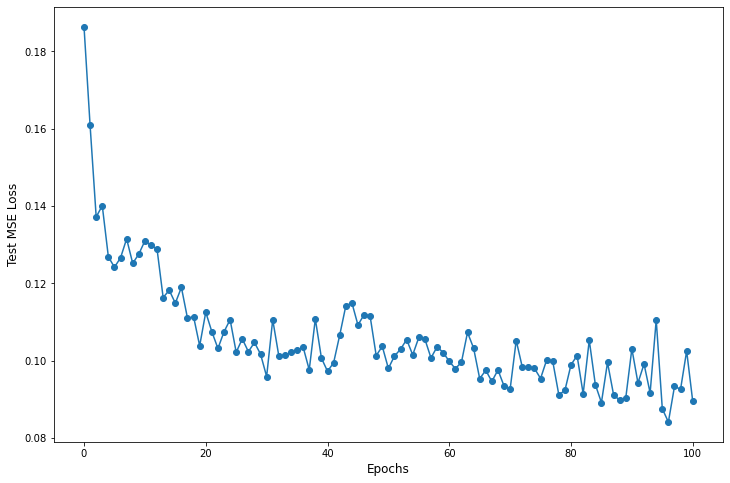

In [45]:
post_test = dict_list_100[99]["post_test_loss"]
test_init = dict_list_100[99]["test_loss_init"]

post_test = np.insert(post_test, 0, test_init[0], axis=0)

plt.figure(figsize = (12,8))

plt.plot(post_test, "o-")
plt.xlabel("Epochs", fontsize = 12)
plt.ylabel("Test MSE Loss", fontsize = 12)


In [50]:

with open("/share/rcifdata/jbarr/UKAEAGroupProject/pipeline_config_jackson.yaml") as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)
    
FLUX = cfg["flux"]
PRETRAINED = cfg["pretrained"]
PATHS = cfg["data"]
SAVE_PATHS = cfg["save_paths"]
sample_size = cfg["sample_size_debug"] # percentage of data to use - lower for debugging
lam = cfg["hyperparams"]["lambda"]
train_size = cfg["hyperparams"]["train_size"]
valid_size = cfg["hyperparams"]["valid_size"]
test_size = cfg["hyperparams"]["test_size"]
batch_size = cfg["hyperparams"]["batch_size"]
candidate_size = cfg["hyperparams"]["candidate_size"]
# Dictionary to store results of the classifier and regressor for later use
output_dict = pt.output_dict

train_dataset, eval_dataset, test_dataset, scaler = pt.prepare_data(
    PATHS["train"], PATHS["validation"], PATHS["test"], target_column=FLUX, samplesize_debug=sample_size
)

In [62]:
post_test[-1]

0.08945090958178044

In [60]:
post_test[-1]*scaler.scale_[-1] + scaler.mean_[-1]

12.916322525038632

In [65]:
0.2*scaler.scale_[-1] + scaler.mean_[-1]

16.063386063948556

In [61]:
post_test[-1]*scaler.scale_[1] + scaler.mean_[1]

7.329573608972792

In [57]:
scaler.scale_

array([7.03060625e+00, 8.56171822e+00, 1.75669553e+00, 1.90535754e-01,
       2.76684141e-01, 6.46944460e-01, 7.67140255e-01, 1.17299623e+00,
       1.33266534e+00, 4.54708728e-01, 6.53889909e+00, 7.39031540e+00,
       9.93823334e-03, 1.90745912e-01, 4.95107301e-01, 2.84675661e+01])

In [67]:
scaler.feature_names_in_

array(['ane', 'ate', 'autor', 'machtor', 'x', 'zeff', 'gammae', 'q',
       'smag', 'alpha', 'ani1', 'ati0', 'normni1', 'ti_te0', 'lognustar',
       'efiitg_gb'], dtype=object)

In [69]:
scaler_features = scaler.feature_names_in_

In [80]:
idx = np.where(scaler_features == "ane")[0][0]

In [81]:
scaler.scale_[idx]

7.030606251113168

## Plot 20 iterations with smaller epochs and patience!

In [83]:
dict_list_20 = []

for i in range(20):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/iterations_20_/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_list_20.append(pickle.load(f))

In [85]:
dict_list_20[19].keys()

dict_keys(['train_loss_init', 'test_loss_init', 'retrain_losses', 'retrain_test_losses', 'post_test_loss', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

In [97]:
dict_list_20[19]["n_train_points"][0]

32312

In [103]:
train_loss = []
test_loss = []
n_points = []
for i in range(20):
    train_loss.append(dict_list_20[i]["retrain_losses"][0])
    test_loss.append(dict_list_20[i]["retrain_test_losses"][0])
    n_points.append(dict_list_20[i]["n_train_points"][0])

    
iter_length = [len(losslist) for losslist in train_loss]
line_pos = np.cumsum(iter_length)
    
train_loss = [loss for losslist in train_loss for loss in losslist]
test_loss = [loss for losslist in test_loss for loss in losslist]

Text(0, 0.5, 'Number of Training Points')

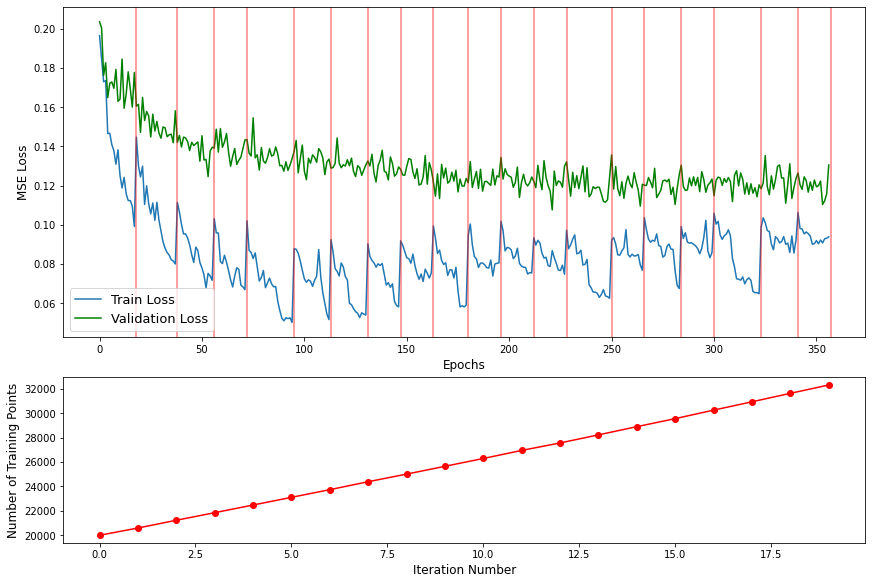

In [104]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_loss, label = "Train Loss")
ax_dict["A"].plot(test_loss, color = "green", label = "Validation Loss")

for xc in line_pos:
    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)

ax_dict["A"].legend(fontsize = 13)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

## Unscaled loss

In [8]:
dict_list_5 = []

for i in range(5):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/unscale_losses/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_list_5.append(pickle.load(f))

In [106]:
dict_list_5[4].keys()

dict_keys(['train_loss_init', 'test_loss_init', 'retrain_losses', 'retrain_test_losses', 'post_test_loss', 'post_test_loss_unscaled', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

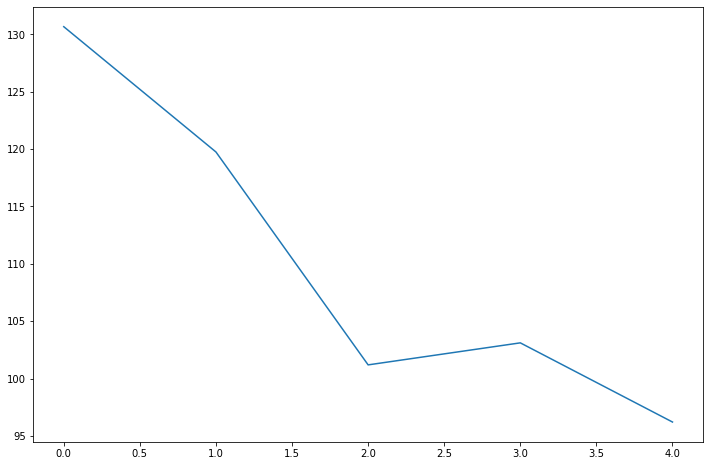

In [108]:
unscaled = []
for i in range(5):
    unscaled.append(dict_list_5[i]["post_test_loss_unscaled"][0])

plt.figure(figsize = (12,8))
plt.plot(unscaled)

## Two Fluxes

In [13]:
dict_two_flux = []

for i in range(10):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_two_flux.append(pickle.load(f))
        

In [15]:
dict_two_flux[9].keys()

dict_keys(['train_loss_init', 'test_loss_init', 'retrain_losses', 'retrain_test_losses', 'post_test_loss', 'post_test_loss_unscaled', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

In [26]:
train_loss_1 = []
test_loss_1 = []

train_loss_2 = []
test_loss_2 = []

n_points = []

for i in range(10):
    train_loss_1.append(dict_two_flux[i]["retrain_losses"][0][0])
    test_loss_1.append(dict_two_flux[i]["retrain_test_losses"][0][0])
    
    train_loss_2.append(dict_two_flux[i]["retrain_losses"][0][1])
    test_loss_2.append(dict_two_flux[i]["retrain_test_losses"][0][1])
    
    n_points.append(dict_two_flux[i]["n_train_points"][0])
    

iter_length_1 = [len(losslist) for losslist in train_loss_1]
iter_length_2 = [len(losslist) for losslist in train_loss_2]
line_pos_1 = np.cumsum(iter_length_1)
line_pos_2 = np.cumsum(iter_length_2)    
    
train_loss_1 = [loss for losslist in train_loss_1 for loss in losslist]
test_loss_1 = [loss for losslist in test_loss_1 for loss in losslist]

train_loss_2 = [loss for losslist in train_loss_2 for loss in losslist]
test_loss_2 = [loss for losslist in test_loss_2 for loss in losslist]

Text(0, 0.5, 'Number of Training Points')

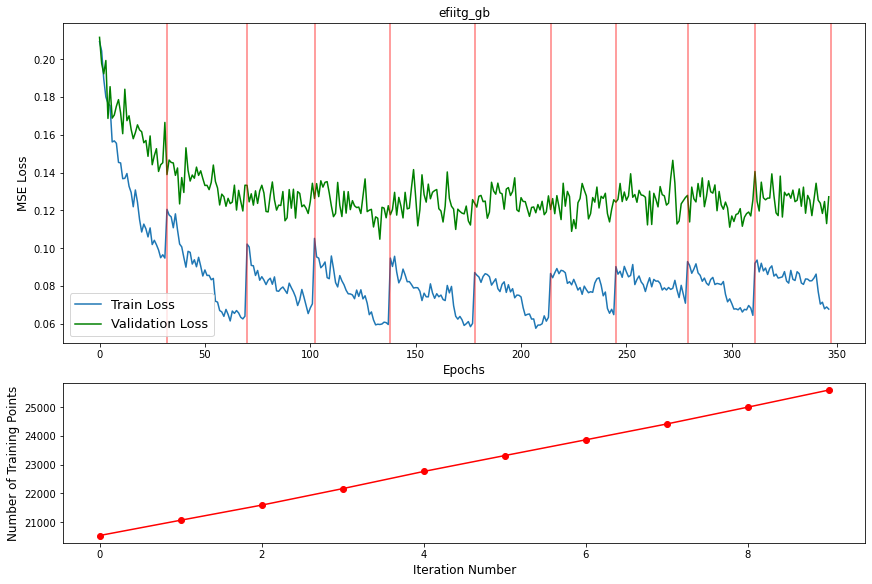

In [31]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_loss_1, label = "Train Loss")
ax_dict["A"].plot(test_loss_1, color = "green", label = "Validation Loss")

for xc in line_pos_1:
    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)
ax_dict["A"].set_title("efiitg_gb")

ax_dict["A"].legend(fontsize = 13)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

Text(0, 0.5, 'Number of Training Points')

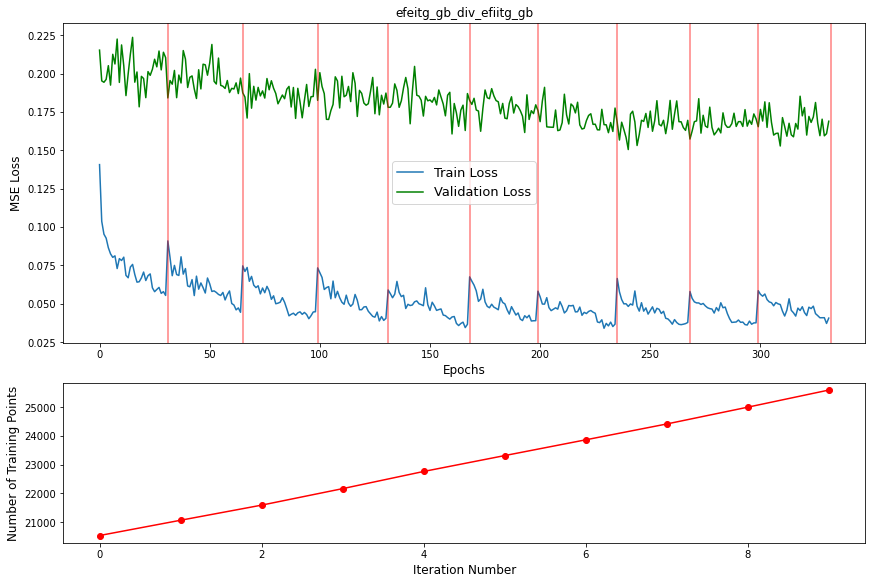

In [33]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_loss_2, label = "Train Loss")
ax_dict["A"].plot(test_loss_2, color = "green", label = "Validation Loss")

for xc in line_pos_2:
    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)

ax_dict["A"].legend(fontsize = 13)
ax_dict["A"].set_title("efeitg_gb_div_efiitg_gb")

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

## Two Flux 0.2 and 0.4 Dropout

In [ ]:
"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes_50_iters_dropout_0.2"
"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes_50_iters_dropout_0.4"

In [36]:
dict_0_2 = []
dict_0_4 = []

for i in range(50):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes_50_iters_dropout_0.2/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_0_2.append(pickle.load(f))
        
for i in range(50):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes_50_iters_dropout_0.4/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_0_4.append(pickle.load(f))

In [45]:
train_loss_1_0_2= []
test_loss_1_0_2= []

train_loss_2_0_2= []
test_loss_2_0_2= []

n_points = []

for i in range(50):
    train_loss_1_0_2.append(dict_0_2[i]["retrain_losses"][0][0])
    test_loss_1_0_2.append(dict_0_2[i]["retrain_test_losses"][0][0])
    
    train_loss_2_0_2.append(dict_0_2[i]["retrain_losses"][0][1])
    test_loss_2_0_2.append(dict_0_2[i]["retrain_test_losses"][0][1])
    
    n_points.append(dict_0_2[i]["n_train_points"][0])
    

iter_length_1_0_2= [len(losslist) for losslist in train_loss_1_0_2]
iter_length_2_0_2= [len(losslist) for losslist in train_loss_2_0_2]
line_pos_1_0_2= np.cumsum(iter_length_1_0_2)
line_pos_2_0_2= np.cumsum(iter_length_2_0_2)    
    
train_losses_1_0_2= [loss for losslist in train_loss_1_0_2 for loss in losslist]
test_losses_1_0_2= [loss for losslist in test_loss_1_0_2 for loss in losslist]

train_losses_2_0_2= [loss for losslist in train_loss_2_0_2 for loss in losslist]
test_losses_2_0_2= [loss for losslist in test_loss_2_0_2 for loss in losslist]

In [47]:
train_loss_1_0_4= []
test_loss_1_0_4= []

train_loss_2_0_4= []
test_loss_2_0_4= []

n_points = []

for i in range(50):
    train_loss_1_0_4.append(dict_0_4[i]["retrain_losses"][0][0])
    test_loss_1_0_4.append(dict_0_4[i]["retrain_test_losses"][0][0])
    
    train_loss_2_0_4.append(dict_0_4[i]["retrain_losses"][0][1])
    test_loss_2_0_4.append(dict_0_4[i]["retrain_test_losses"][0][1])
    
    n_points.append(dict_0_4[i]["n_train_points"][0])
    

iter_length_1_0_4= [len(losslist) for losslist in train_loss_1_0_4]
iter_length_2_0_4= [len(losslist) for losslist in train_loss_2_0_4]
line_pos_1_0_4= np.cumsum(iter_length_1_0_4)
line_pos_2_0_4= np.cumsum(iter_length_2_0_4)    
    
train_losses_1_0_4= [loss for losslist in train_loss_1_0_4 for loss in losslist]
test_losses_1_0_4= [loss for losslist in test_loss_1_0_4 for loss in losslist]

train_losses_2_0_4= [loss for losslist in train_loss_2_0_4 for loss in losslist]
test_losses_2_0_4= [loss for losslist in test_loss_2_0_4 for loss in losslist]

Text(0, 0.5, 'Number of Training Points')

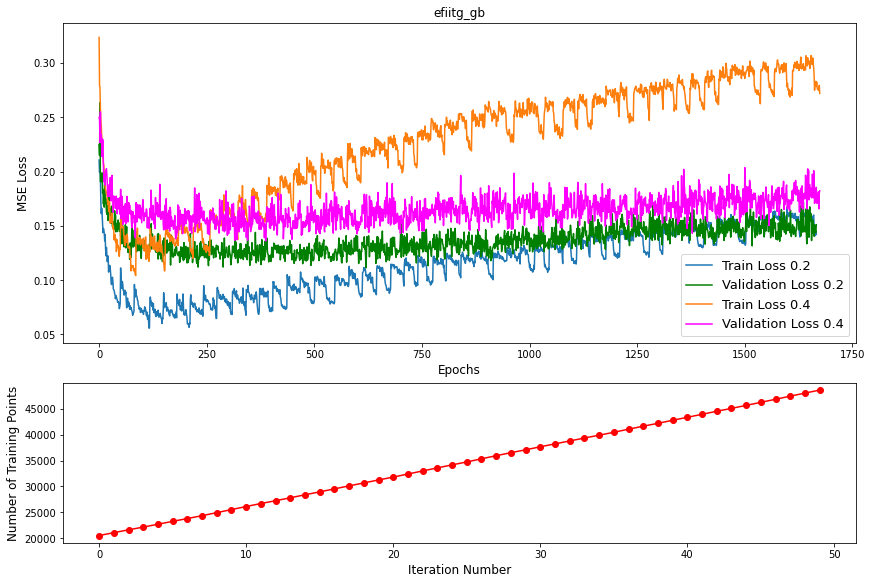

In [57]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_losses_1_0_2, label = "Train Loss 0.2")
ax_dict["A"].plot(test_losses_1_0_2, color = "green", label = "Validation Loss 0.2")

ax_dict["A"].plot(train_losses_1_0_4, label = "Train Loss 0.4")
ax_dict["A"].plot(test_losses_1_0_4, color = "magenta", label = "Validation Loss 0.4")

#for xc in line_pos_1_0_2:
#    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)
ax_dict["A"].set_title("efiitg_gb")

ax_dict["A"].legend(fontsize = 13)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

Text(0, 0.5, 'Number of Training Points')

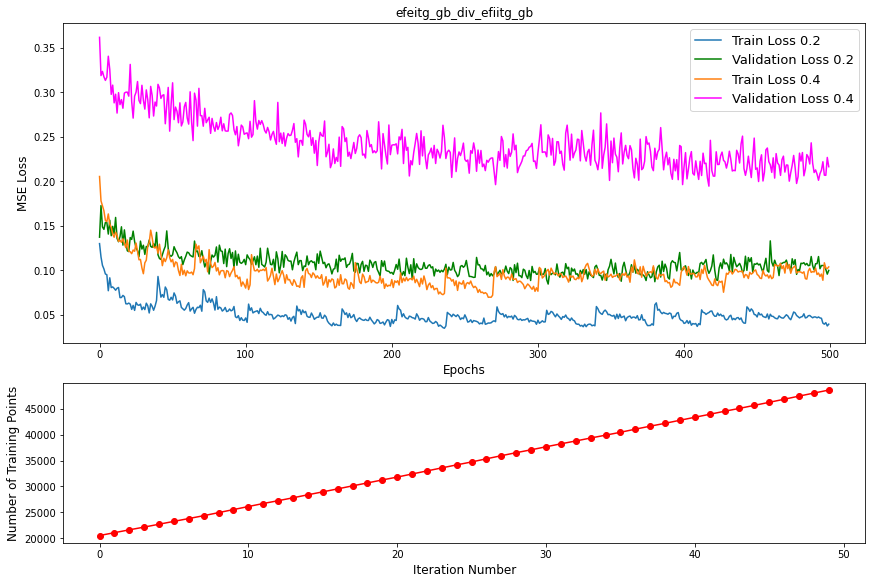

In [55]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_losses_2_0_2, label = "Train Loss 0.2")
ax_dict["A"].plot(test_losses_2_0_2, color = "green", label = "Validation Loss 0.2")

ax_dict["A"].plot(train_losses_2_0_4[:500], label = "Train Loss 0.4")
ax_dict["A"].plot(test_losses_2_0_4[:500], color = "magenta", label = "Validation Loss 0.4")

#for xc in line_pos_1_0_2:
#    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)
ax_dict["A"].set_title("efeitg_gb_div_efiitg_gb")

ax_dict["A"].legend(fontsize = 13)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

## Compare Acquisitions

In [100]:
dict_one = []
dict_add = []
dict_rand = []
dict_dist = []


for i in range(10):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes_one_uncertainty/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_one.append(pickle.load(f))
        
for i in range(10):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes_add_uncertainty/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_add.append(pickle.load(f))
        
for i in range(10):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/two_fluxes_random/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_rand.append(pickle.load(f))
        
for i in range(10):
    with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/dist/dist_1/efiitg_gb/pipeline_outputs_lam_1_iteration_{i}.pkl", "rb") as f:
        dict_dist.append(pickle.load(f))

In [101]:
train_loss_1_one= []
test_loss_1_one= []

train_loss_2_one= []
test_loss_2_one= []

n_points = []

for i in range(10):
    train_loss_1_one.append(dict_one[i]["retrain_losses"][0][0])
    test_loss_1_one.append(dict_one[i]["retrain_test_losses"][0][0])
    
    train_loss_2_one.append(dict_one[i]["retrain_losses"][0][1])
    test_loss_2_one.append(dict_one[i]["retrain_test_losses"][0][1])
    
    n_points.append(dict_one[i]["n_train_points"][0])
    

iter_length_1_one= [len(losslist) for losslist in train_loss_1_one]
iter_length_2_one= [len(losslist) for losslist in train_loss_2_one]
line_pos_1_one= np.cumsum(iter_length_1_one)
line_pos_2_one= np.cumsum(iter_length_2_one)    
    
train_losses_1_one= [loss for losslist in train_loss_1_one for loss in losslist]
test_losses_1_one= [loss for losslist in test_loss_1_one for loss in losslist]

train_losses_2_one= [loss for losslist in train_loss_2_one for loss in losslist]
test_losses_2_one= [loss for losslist in test_loss_2_one for loss in losslist]

In [81]:
train_loss_1_add= []
test_loss_1_add= []

train_loss_2_add= []
test_loss_2_add= []

n_points = []

for i in range(10):
    train_loss_1_add.append(dict_add[i]["retrain_losses"][0][0])
    test_loss_1_add.append(dict_add[i]["retrain_test_losses"][0][0])
    
    train_loss_2_add.append(dict_add[i]["retrain_losses"][0][1])
    test_loss_2_add.append(dict_add[i]["retrain_test_losses"][0][1])
    
    n_points.append(dict_add[i]["n_train_points"][0])
    

iter_length_1_add= [len(losslist) for losslist in train_loss_1_add]
iter_length_2_add= [len(losslist) for losslist in train_loss_2_add]
line_pos_1_add= np.cumsum(iter_length_1_add)
line_pos_2_add= np.cumsum(iter_length_2_add)    
    
train_losses_1_add= [loss for losslist in train_loss_1_add for loss in losslist]
test_losses_1_add= [loss for losslist in test_loss_1_add for loss in losslist]

train_losses_2_add= [loss for losslist in train_loss_2_add for loss in losslist]
test_losses_2_add= [loss for losslist in test_loss_2_add for loss in losslist]

In [102]:
train_loss_1_rand= []
test_loss_1_rand= []

train_loss_2_rand= []
test_loss_2_rand= []

n_points = []

for i in range(10):
    train_loss_1_rand.append(dict_rand[i]["retrain_losses"][0][0])
    test_loss_1_rand.append(dict_rand[i]["retrain_test_losses"][0][0])
    
    train_loss_2_rand.append(dict_rand[i]["retrain_losses"][0][1])
    test_loss_2_rand.append(dict_rand[i]["retrain_test_losses"][0][1])
    
    n_points.append(dict_rand[i]["n_train_points"][0])
    

iter_length_1_rand= [len(losslist) for losslist in train_loss_1_rand]
iter_length_2_rand= [len(losslist) for losslist in train_loss_2_rand]
line_pos_1_rand= np.cumsum(iter_length_1_rand)
line_pos_2_rand= np.cumsum(iter_length_2_rand)    
    
train_losses_1_rand= [loss for losslist in train_loss_1_rand for loss in losslist]
test_losses_1_rand= [loss for losslist in test_loss_1_rand for loss in losslist]

train_losses_2_rand= [loss for losslist in train_loss_2_rand for loss in losslist]
test_losses_2_rand= [loss for losslist in test_loss_2_rand for loss in losslist]

In [103]:
train_loss_1_dist= []
test_loss_1_dist= []

train_loss_2_dist= []
test_loss_2_dist= []

n_points = []

for i in range(10):
    train_loss_1_dist.append(dict_dist[i]["retrain_losses"][0][0])
    test_loss_1_dist.append(dict_dist[i]["retrain_test_losses"][0][0])
    
    train_loss_2_dist.append(dict_dist[i]["retrain_losses"][0][1])
    test_loss_2_dist.append(dict_dist[i]["retrain_test_losses"][0][1])
    
    n_points.append(dict_dist[i]["n_train_points"][0])
    

iter_length_1_dist= [len(losslist) for losslist in train_loss_1_dist]
iter_length_2_dist= [len(losslist) for losslist in train_loss_2_dist]
line_pos_1_dist= np.cumsum(iter_length_1_dist)
line_pos_2_dist= np.cumsum(iter_length_2_dist)    
    
train_losses_1_dist= [loss for losslist in train_loss_1_dist for loss in losslist]
test_losses_1_dist= [loss for losslist in test_loss_1_dist for loss in losslist]

train_losses_2_dist= [loss for losslist in train_loss_2_dist for loss in losslist]
test_losses_2_dist= [loss for losslist in test_loss_2_dist for loss in losslist]

Text(0, 0.5, 'Number of Training Points')

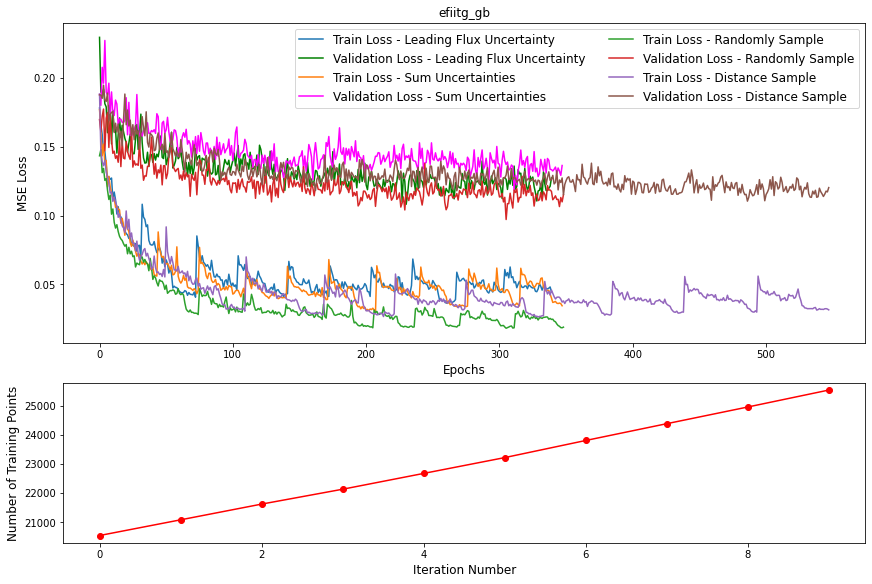

In [106]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_losses_1_one, label = "Train Loss - Leading Flux Uncertainty")
ax_dict["A"].plot(test_losses_1_one, color = "green", label = "Validation Loss - Leading Flux Uncertainty")


ax_dict["A"].plot(train_losses_1_add, label = "Train Loss - Sum Uncertainties")
ax_dict["A"].plot(test_losses_1_add, color = "magenta", label = "Validation Loss - Sum Uncertainties")

ax_dict["A"].plot(train_losses_1_rand, label = "Train Loss - Randomly Sample")
ax_dict["A"].plot(test_losses_1_rand, label = "Validation Loss - Randomly Sample")


ax_dict["A"].plot(train_losses_1_dist, label = "Train Loss - Distance Sample")
ax_dict["A"].plot(test_losses_1_dist, label = "Validation Loss - Distance Sample")

#for xc in line_pos_1_0_2:
#    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)
ax_dict["A"].set_title("efiitg_gb")

ax_dict["A"].legend(fontsize = 12, ncol = 2)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

In [ ]:

mosaic = """
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(train_losses_2_one, label = "Train Loss - Leading Flux Uncertainty")
ax_dict["A"].plot(test_losses_2_one, color = "green", label = "Validation Loss - Leading Flux Uncertainty")


ax_dict["A"].plot(train_losses_2_add, label = "Train Loss - Sum Uncertainties")
ax_dict["A"].plot(test_losses_1_add, color = "magenta", label = "Validation Loss - Sum Uncertainties")

ax_dict["A"].plot(train_losses_1_rand, label = "Train Loss - Randomly Sample")
ax_dict["A"].plot(test_losses_1_rand, label = "Validation Loss - Randomly Sample")

#for xc in line_pos_1_0_2:
#    ax_dict["A"].axvline(x=xc, alpha = 0.5, color = "red")
    
    
ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)
ax_dict["A"].set_title("efiitg_gb")

ax_dict["A"].legend(fontsize = 13)

ax_dict["B"].plot(n_points, color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

## Plot Average Acquisition values

In [2]:
dict_add = []
dict_lead = []
dict_rand = []

for i in range(1,50):
    dict_add_temp = []
    dict_lead_temp = []
    dict_rand_temp = []
    

    for j in range(10):
        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/averaging/add_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_add_temp.append(pickle.load(f))

        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/averaging/lead_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_lead_temp.append(pickle.load(f))

        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/averaging/rand_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_rand_temp.append(pickle.load(f))
    
    dict_add.append(dict_add_temp)
    dict_lead.append(dict_lead_temp)
    dict_rand.append(dict_rand_temp)

In [3]:
np.hstack(dict_add[0][0]["holdout_pred_after"][0][0]).shape

(10000,)

In [4]:
train_loss_1_add = []
train_loss_2_add = []

test_loss_1_add = []
test_loss_2_add = []

iter_length_1_add = []
iter_length_2_add = []
line_pos_1_add = []
line_pos_2_add = []

n_points_av = []


for j in range(len(dict_add)):
    train_loss_1_add_temp = []
    test_loss_1_add_temp = []

    train_loss_2_add_temp = []
    test_loss_2_add_temp = []

    n_points_temp = []

    for i in range(10):
        train_loss_1_add_temp.append(dict_add[j][i]["retrain_losses"][0][0])
        test_loss_1_add_temp.append(dict_add[j][i]["retrain_test_losses"][0][0])

        train_loss_2_add_temp.append(dict_add[j][i]["retrain_losses"][0][1])
        test_loss_2_add_temp.append(dict_add[j][i]["retrain_test_losses"][0][1])

        n_points_temp.append(dict_add[j][i]["n_train_points"][0])

    iter_length_1_add_temp = [len(losslist) for losslist in train_loss_1_add_temp]
    iter_length_2_add_temp = [len(losslist) for losslist in train_loss_2_add_temp]
    line_pos_1_add_temp = np.cumsum(iter_length_1_add_temp)
    line_pos_2_add_temp = np.cumsum(iter_length_2_add_temp)    

    train_losses_1_add_temp = [loss for losslist in train_loss_1_add_temp for loss in losslist]
    test_losses_1_add_temp = [loss for losslist in test_loss_1_add_temp for loss in losslist]

    train_losses_2_add_temp = [loss for losslist in train_loss_2_add_temp for loss in losslist]
    test_losses_2_add_temp = [loss for losslist in test_loss_2_add_temp for loss in losslist]
    
    
    train_loss_1_add.append(train_losses_1_add_temp)
    test_loss_1_add.append(test_losses_1_add_temp)
    
    train_loss_2_add.append(train_losses_2_add_temp)
    test_loss_2_add.append(test_losses_2_add_temp)
    
    iter_length_1_add.append(iter_length_1_add_temp)
    iter_length_2_add.append(iter_length_2_add_temp)
    
    line_pos_1_add.append(line_pos_1_add_temp)
    line_pos_2_add.append(line_pos_2_add_temp)
    
    n_points_av.append(n_points_temp)
    

min_length_1 = np.inf
min_length_2 = np.inf
for i in range(len(train_loss_1_add)):
    min_length_1 = min(len(train_loss_1_add[i]), min_length_1)
    min_length_2 = min(len(train_loss_2_add[i]), min_length_2)
    
for i in range(len(dict_add)):
    train_loss_1_add[i] = train_loss_1_add[i][:min_length_1]
    train_loss_2_add[i] = train_loss_2_add[i][:min_length_2]
    
    test_loss_1_add[i] = test_loss_1_add[i][:min_length_1]
    test_loss_2_add[i] = test_loss_2_add[i][:min_length_2]
    
train_loss_1_add_av = np.mean(np.array(train_loss_1_add), axis = 0)
train_loss_1_add_std = np.std(np.array(train_loss_1_add), axis = 0)

test_loss_1_add_av = np.mean(np.array(test_loss_1_add), axis = 0)
test_loss_1_add_std = np.std(np.array(test_loss_1_add), axis = 0)

train_loss_2_add_av = np.mean(np.array(train_loss_2_add), axis = 0)
train_loss_2_add_std = np.std(np.array(train_loss_2_add), axis = 0)

test_loss_2_add_av = np.mean(np.array(test_loss_2_add), axis = 0)
test_loss_2_add_std = np.std(np.array(test_loss_2_add), axis = 0)

In [5]:
train_loss_1_lead = []
train_loss_2_lead = []

test_loss_1_lead = []
test_loss_2_lead = []

iter_length_1_lead = []
iter_length_2_lead = []
line_pos_1_lead = []
line_pos_2_lead = []


for j in range(len(dict_lead)):
    train_loss_1_lead_temp = []
    test_loss_1_lead_temp = []

    train_loss_2_lead_temp = []
    test_loss_2_lead_temp = []

    for i in range(10):
        train_loss_1_lead_temp.append(dict_lead[j][i]["retrain_losses"][0][0])
        test_loss_1_lead_temp.append(dict_lead[j][i]["retrain_test_losses"][0][0])

        train_loss_2_lead_temp.append(dict_lead[j][i]["retrain_losses"][0][1])
        test_loss_2_lead_temp.append(dict_lead[j][i]["retrain_test_losses"][0][1])

    iter_length_1_lead_temp = [len(losslist) for losslist in train_loss_1_lead_temp]
    iter_length_2_lead_temp = [len(losslist) for losslist in train_loss_2_lead_temp]
    line_pos_1_lead_temp = np.cumsum(iter_length_1_lead_temp)
    line_pos_2_lead_temp = np.cumsum(iter_length_2_lead_temp)    

    train_losses_1_lead_temp = [loss for losslist in train_loss_1_lead_temp for loss in losslist]
    test_losses_1_lead_temp = [loss for losslist in test_loss_1_lead_temp for loss in losslist]

    train_losses_2_lead_temp = [loss for losslist in train_loss_2_lead_temp for loss in losslist]
    test_losses_2_lead_temp = [loss for losslist in test_loss_2_lead_temp for loss in losslist]
    
    
    train_loss_1_lead.append(train_losses_1_lead_temp)
    test_loss_1_lead.append(test_losses_1_lead_temp)
    
    train_loss_2_lead.append(train_losses_2_lead_temp)
    test_loss_2_lead.append(test_losses_2_lead_temp)
    
    iter_length_1_lead.append(iter_length_1_lead_temp)
    iter_length_2_lead.append(iter_length_2_lead_temp)
    
    line_pos_1_lead.append(line_pos_1_lead_temp)
    line_pos_2_lead.append(line_pos_2_lead_temp)
    

min_length_1 = np.inf
min_length_2 = np.inf
for i in range(len(train_loss_1_lead)):
    min_length_1 = min(len(train_loss_1_lead[i]), min_length_1)
    min_length_2 = min(len(train_loss_2_lead[i]), min_length_2)
    
for i in range(len(dict_lead)):
    train_loss_1_lead[i] = train_loss_1_lead[i][:min_length_1]
    train_loss_2_lead[i] = train_loss_2_lead[i][:min_length_2]
    
    test_loss_1_lead[i] = test_loss_1_lead[i][:min_length_1]
    test_loss_2_lead[i] = test_loss_2_lead[i][:min_length_2]
    
train_loss_1_lead_av = np.mean(np.array(train_loss_1_lead), axis = 0)
train_loss_1_lead_std = np.std(np.array(train_loss_1_lead), axis = 0)

test_loss_1_lead_av = np.mean(np.array(test_loss_1_lead), axis = 0)
test_loss_1_lead_std = np.std(np.array(test_loss_1_lead), axis = 0)

train_loss_2_lead_av = np.mean(np.array(train_loss_2_lead), axis = 0)
train_loss_2_lead_std = np.std(np.array(train_loss_2_lead), axis = 0)

test_loss_2_lead_av = np.mean(np.array(test_loss_2_lead), axis = 0)
test_loss_2_lead_std = np.std(np.array(test_loss_2_lead), axis = 0)

In [6]:
train_loss_1_rand = []
train_loss_2_rand = []

test_loss_1_rand = []
test_loss_2_rand = []

iter_length_1_rand = []
iter_length_2_rand = []
line_pos_1_rand = []
line_pos_2_rand = []


for j in range(len(dict_rand)):
    train_loss_1_rand_temp = []
    test_loss_1_rand_temp = []

    train_loss_2_rand_temp = []
    test_loss_2_rand_temp = []

    for i in range(10):
        train_loss_1_rand_temp.append(dict_rand[j][i]["retrain_losses"][0][0])
        test_loss_1_rand_temp.append(dict_rand[j][i]["retrain_test_losses"][0][0])

        train_loss_2_rand_temp.append(dict_rand[j][i]["retrain_losses"][0][1])
        test_loss_2_rand_temp.append(dict_rand[j][i]["retrain_test_losses"][0][1])

    iter_length_1_rand_temp = [len(losslist) for losslist in train_loss_1_rand_temp]
    iter_length_2_rand_temp = [len(losslist) for losslist in train_loss_2_rand_temp]
    line_pos_1_rand_temp = np.cumsum(iter_length_1_rand_temp)
    line_pos_2_rand_temp = np.cumsum(iter_length_2_rand_temp)    

    train_losses_1_rand_temp = [loss for losslist in train_loss_1_rand_temp for loss in losslist]
    test_losses_1_rand_temp = [loss for losslist in test_loss_1_rand_temp for loss in losslist]

    train_losses_2_rand_temp = [loss for losslist in train_loss_2_rand_temp for loss in losslist]
    test_losses_2_rand_temp = [loss for losslist in test_loss_2_rand_temp for loss in losslist]
    
    
    train_loss_1_rand.append(train_losses_1_rand_temp)
    test_loss_1_rand.append(test_losses_1_rand_temp)
    
    train_loss_2_rand.append(train_losses_2_rand_temp)
    test_loss_2_rand.append(test_losses_2_rand_temp)
    
    iter_length_1_rand.append(iter_length_1_rand_temp)
    iter_length_2_rand.append(iter_length_2_rand_temp)
    
    line_pos_1_rand.append(line_pos_1_rand_temp)
    line_pos_2_rand.append(line_pos_2_rand_temp)
    

min_length_1 = np.inf
min_length_2 = np.inf
for i in range(len(train_loss_1_rand)):
    min_length_1 = min(len(train_loss_1_rand[i]), min_length_1)
    min_length_2 = min(len(train_loss_2_rand[i]), min_length_2)
    
for i in range(len(dict_rand)):
    train_loss_1_rand[i] = train_loss_1_rand[i][:min_length_1]
    train_loss_2_rand[i] = train_loss_2_rand[i][:min_length_2]
    
    test_loss_1_rand[i] = test_loss_1_rand[i][:min_length_1]
    test_loss_2_rand[i] = test_loss_2_rand[i][:min_length_2]
    
train_loss_1_rand_av = np.mean(np.array(train_loss_1_rand), axis = 0)
train_loss_1_rand_std = np.std(np.array(train_loss_1_rand), axis = 0)

test_loss_1_rand_av = np.mean(np.array(test_loss_1_rand), axis = 0)
test_loss_1_rand_std = np.std(np.array(test_loss_1_rand), axis = 0)

train_loss_2_rand_av = np.mean(np.array(train_loss_2_rand), axis = 0)
train_loss_2_rand_std = np.std(np.array(train_loss_2_rand), axis = 0)

test_loss_2_rand_av = np.mean(np.array(test_loss_2_rand), axis = 0)
test_loss_2_rand_std = np.std(np.array(test_loss_2_rand), axis = 0)

In [7]:
#run_min_1 = np.min(np.array(iter_length_1_add), axis = 1)
#run_min_2 = np.min(np.array(iter_length_2_add), axis = 1)

# for i in range(len(dict_add)):
#     train_loss_1_add[i] = train_loss_1_add[i][:run_min_1[i]]
#     train_loss_2_add[i] = train_loss_2_add[i][:run_min_2[i]]
    
#     test_loss_1_add[i] = test_loss_1_add[i][:run_min_1[i]]
#     test_loss_2_add[i] = test_loss_2_add[i][:run_min_2[i]]

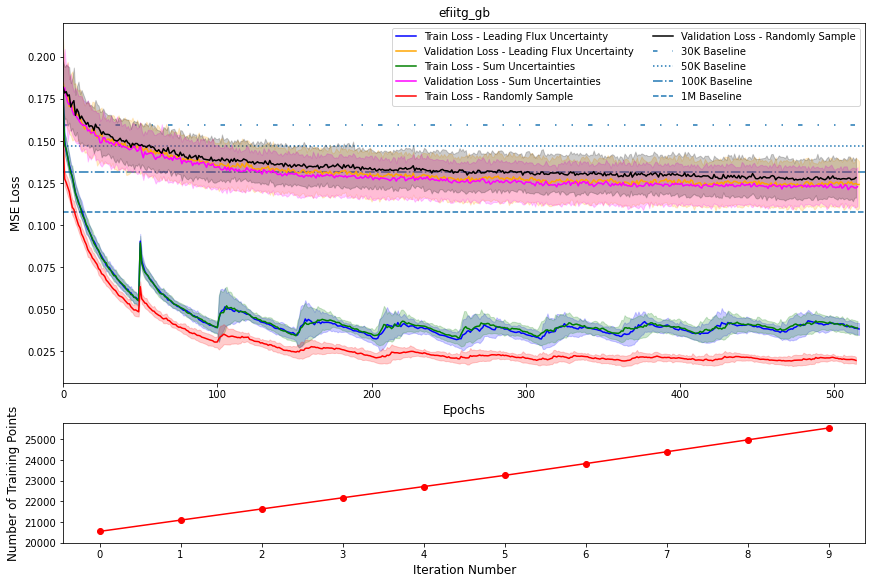

In [8]:
#plt.figure(constrained_layout= True, figsize = (12,8))
mosaic = """
    A
    A
    A
    B
"""

fig = plt.figure(constrained_layout= True, figsize = (12,8))

ax_dict = fig.subplot_mosaic(mosaic)


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_add_av))),
    train_loss_1_add_av - train_loss_1_add_std,
    train_loss_1_add_av + train_loss_1_add_std,  
    alpha = 0.2,
    color = "blue"
    )
ax_dict["A"].plot(train_loss_1_add_av, color = "blue", label = "Train Loss - Leading Flux Uncertainty")


ax_dict["A"].fill_between(
    list(range(len(test_loss_1_add_av))),
    test_loss_1_add_av - test_loss_1_add_std,
    test_loss_1_add_av + test_loss_1_add_std,
    alpha = 0.2,
    color = "orange"
    )
ax_dict["A"].plot(test_loss_1_add_av, color = "orange", label = "Validation Loss - Leading Flux Uncertainty")


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_lead_av))),
    train_loss_1_lead_av - train_loss_1_lead_std,
    train_loss_1_lead_av + train_loss_1_lead_std,
    alpha = 0.2,
    color = "green",
    )
ax_dict["A"].plot(train_loss_1_lead_av, color = "green", label = "Train Loss - Sum Uncertainties")


ax_dict["A"].fill_between(
    list(range(len(test_loss_1_lead_av))),
    test_loss_1_lead_av - test_loss_1_lead_std,
    test_loss_1_lead_av + test_loss_1_lead_std,
    alpha = 0.2,
    color = "magenta",
    )
ax_dict["A"].plot(test_loss_1_lead_av, color = "magenta", label = "Validation Loss - Sum Uncertainties")


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_rand_av))),
    train_loss_1_rand_av - train_loss_1_rand_std,
    train_loss_1_rand_av + train_loss_1_rand_std,
    alpha = 0.2,
    color = "red",
    )
ax_dict["A"].plot(train_loss_1_rand_av, color = "red", label = "Train Loss - Randomly Sample")


ax_dict["A"].fill_between(
    list(range(len(test_loss_1_rand_av))),
    test_loss_1_rand_av - test_loss_1_rand_std,
    test_loss_1_rand_av + test_loss_1_rand_std,
    color = "black",
    alpha = 0.2,
    )
ax_dict["A"].plot(test_loss_1_rand_av, color = "black", label = "Validation Loss - Randomly Sample")

ax_dict["A"].axhline(y = 0.1596, linestyle = (0, (3, 10, 1, 10, 1, 10)), label = "30K Baseline", zorder = -1) # Gotten from Average_Performance.ipynb 
ax_dict["A"].axhline(y = 0.1473, linestyle = "dotted", label = "50K Baseline", zorder = -1) 
ax_dict["A"].axhline(y = 0.1318, linestyle = "dashdot", label = "100K Baseline", zorder = -1) 
ax_dict["A"].axhline(y = 0.1079, linestyle = "dashed", label = "1M Baseline", zorder = -1)

ax_dict["A"].set_xlabel("Epochs", fontsize = 12)
ax_dict["A"].set_ylabel("MSE Loss", fontsize = 12)
ax_dict["A"].set_title("efiitg_gb", fontsize = 12)
ax_dict["A"].set_xlim(0, 520)


#ax_dict["A"].legend(fontsize = 13)
ax_dict["A"].legend(ncol = 2)
#.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax_dict["B"].plot(np.mean(np.array(n_points_av), axis = 0), color = "red", marker = "o")
ax_dict["B"].set_xlabel("Iteration Number", fontsize = 12)
ax_dict["B"].set_ylabel("Number of Training Points", fontsize = 12)

ax_dict["B"].set_yticks(np.arange(20_000, 26_000, 1_000));
ax_dict["B"].set_xticks(np.arange(0, 10, 1));


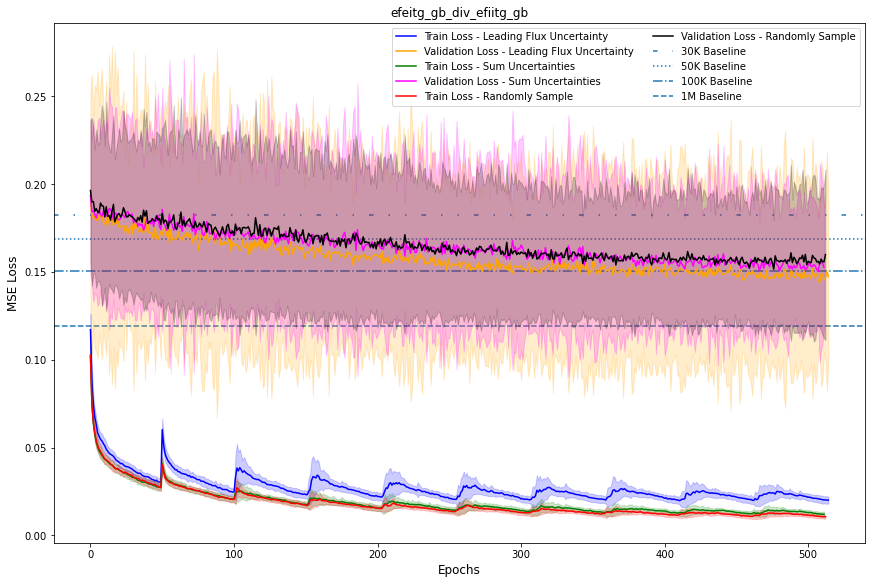

In [9]:
plt.figure(constrained_layout= True, figsize = (12,8))


plt.fill_between(
    list(range(len(train_loss_2_add_av))),
    train_loss_2_add_av - train_loss_2_add_std,
    train_loss_2_add_av + train_loss_2_add_std,  
    alpha = 0.2,
    color = "blue"
    )
plt.plot(train_loss_2_add_av, color = "blue", label = "Train Loss - Leading Flux Uncertainty")


plt.fill_between(
    list(range(len(test_loss_2_add_av))),
    test_loss_2_add_av - test_loss_2_add_std,
    test_loss_2_add_av + test_loss_2_add_std,
    alpha = 0.2,
    color = "orange"
    )
plt.plot(test_loss_2_add_av, color = "orange", label = "Validation Loss - Leading Flux Uncertainty")


plt.fill_between(
    list(range(len(train_loss_2_lead_av))),
    train_loss_2_lead_av - train_loss_2_lead_std,
    train_loss_2_lead_av + train_loss_2_lead_std,
    alpha = 0.2,
    color = "green",
    )
plt.plot(train_loss_2_lead_av, color = "green", label = "Train Loss - Sum Uncertainties")


plt.fill_between(
    list(range(len(test_loss_2_lead_av))),
    test_loss_2_lead_av - test_loss_2_lead_std,
    test_loss_2_lead_av + test_loss_2_lead_std,
    alpha = 0.2,
    color = "magenta",
    )
plt.plot(test_loss_2_lead_av, color = "magenta", label = "Validation Loss - Sum Uncertainties")


plt.fill_between(
    list(range(len(train_loss_2_rand_av))),
    train_loss_2_rand_av - train_loss_2_rand_std,
    train_loss_2_rand_av + train_loss_2_rand_std,
    alpha = 0.2,
    color = "red",
    )
plt.plot(train_loss_2_rand_av, color = "red", label = "Train Loss - Randomly Sample")


plt.fill_between(
    list(range(len(test_loss_2_rand_av))),
    test_loss_2_rand_av - test_loss_2_rand_std,
    test_loss_2_rand_av + test_loss_2_rand_std,
    color = "black",
    alpha = 0.2,
    )
plt.plot(test_loss_2_rand_av, color = "black", label = "Validation Loss - Randomly Sample")


plt.axhline(y = 0.1824, linestyle = (0, (3, 10, 1, 10, 1, 10)), label = "30K Baseline", zorder = -1) # Gotten from Average_Performance.ipynb 
plt.axhline(y = 0.1688, linestyle = "dotted", label = "50K Baseline", zorder = -1) 
plt.axhline(y = 0.1503, linestyle = "dashdot", label = "100K Baseline", zorder = -1) 
plt.axhline(y = 0.1194, linestyle = "dashed", label = "1M Baseline", zorder = -1)

    
plt.xlabel("Epochs", fontsize = 12)
plt.ylabel("MSE Loss", fontsize = 12)
plt.title("efeitg_gb_div_efiitg_gb")


plt.legend(ncol = 2)

## Paper Results

In [182]:
dict_lead = []
dict_rand = []
dict_dist = []

iters = 20

for i in range(1,23):
    dict_lead_temp = []
    dict_rand_temp = []
    dict_dist_temp = []
    

    for j in range(iters):
        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/leading_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_lead_temp.append(pickle.load(f))

        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/random_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_rand_temp.append(pickle.load(f))

        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/dist_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_dist_temp.append(pickle.load(f))
    
    dict_lead.append(dict_lead_temp)
    dict_rand.append(dict_rand_temp)
    dict_dist.append(dict_dist_temp)

In [108]:
dict_lead[0][0].keys()

dict_keys(['train_loss_init', 'test_loss_init', 'retrain_losses', 'retrain_val_losses', 'retrain_losses_unscaled', 'retrain_val_losses_unscaled', 'post_test_loss', 'post_test_loss_unscaled', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

In [183]:
train_loss_1_lead = []
val_loss_1_lead = []
test_loss_1_lead = []


iter_length_1_lead = []
line_pos_1_lead = []
n_points_av = []


for j in range(len(dict_lead)):
    train_loss_1_lead_temp = []
    val_loss_1_lead_temp = []
    test_loss_1_lead_temp = []

    n_points_temp = []
    
    test_loss_1_lead_temp.append(dict_lead[j][0]["test_loss_init"][0])

    for i in range(iters):
        train_loss_1_lead_temp.append(dict_lead[j][i]["retrain_losses"][0][0])
        val_loss_1_lead_temp.append(dict_lead[j][i]["retrain_val_losses"][0][0])

        n_points_temp.append(dict_lead[j][i]["n_train_points"][0])
        
        test_loss_1_lead_temp.append(dict_lead[j][i]["post_test_loss"][0][0])

    iter_length_1_lead_temp = [len(losslist) for losslist in train_loss_1_lead_temp]
    line_pos_1_lead_temp = np.cumsum(iter_length_1_lead_temp)
    line_pos_1_lead_temp = np.insert(line_pos_1_lead_temp,0,0) # append 0 to start
     

    train_losses_1_lead_temp = [loss for losslist in train_loss_1_lead_temp for loss in losslist]
    val_losses_1_lead_temp = [loss for losslist in val_loss_1_lead_temp for loss in losslist]
    
    train_loss_1_lead.append(train_losses_1_lead_temp)
    val_loss_1_lead.append(val_losses_1_lead_temp)
    
    iter_length_1_lead.append(iter_length_1_lead_temp)
    line_pos_1_lead.append(line_pos_1_lead_temp)
    
    n_points_av.append(n_points_temp)
    
    test_loss_1_lead.append(test_loss_1_lead_temp)
    

min_length_1 = np.inf

for i in range(len(train_loss_1_lead)):
    min_length_1 = min(len(train_loss_1_lead[i]), min_length_1)
    
for i in range(len(dict_lead)):
    train_loss_1_lead[i] = train_loss_1_lead[i][:min_length_1]    
    val_loss_1_lead[i] = val_loss_1_lead[i][:min_length_1]


train_loss_1_lead_av = np.mean(np.array(train_loss_1_lead), axis = 0)
train_loss_1_lead_std = np.std(np.array(train_loss_1_lead), axis = 0)

val_loss_1_lead_av = np.mean(np.array(val_loss_1_lead), axis = 0)
val_loss_1_lead_std = np.std(np.array(val_loss_1_lead), axis = 0)

test_loss_1_lead_av = np.mean(np.array(test_loss_1_lead), axis = 0)
test_loss_1_lead_std = np.std(np.array(test_loss_1_lead), axis = 0)

line_pos_1_lead_av = np.mean(np.array(line_pos_1_lead), axis = 0)

In [184]:
train_loss_1_rand = []
val_loss_1_rand = []
test_loss_1_rand = []

iter_length_1_rand = []
line_pos_1_rand = []
n_points_av = []


for j in range(len(dict_rand)):
    train_loss_1_rand_temp = []
    val_loss_1_rand_temp = []
    test_loss_1_rand_temp = []

    n_points_temp = []
    
    test_loss_1_rand_temp.append(dict_rand[j][0]["test_loss_init"][0])

    for i in range(iters):
        train_loss_1_rand_temp.append(dict_rand[j][i]["retrain_losses"][0][0])
        val_loss_1_rand_temp.append(dict_rand[j][i]["retrain_val_losses"][0][0])

        n_points_temp.append(dict_rand[j][i]["n_train_points"][0])
        
        test_loss_1_rand_temp.append(dict_rand[j][i]["post_test_loss"][0][0])

    iter_length_1_rand_temp = [len(losslist) for losslist in train_loss_1_rand_temp]
    line_pos_1_rand_temp = np.cumsum(iter_length_1_rand_temp)
    line_pos_1_rand_temp = np.insert(line_pos_1_rand_temp,0,0) # append 0 to start

    train_losses_1_rand_temp = [loss for losslist in train_loss_1_rand_temp for loss in losslist]
    val_losses_1_rand_temp = [loss for losslist in val_loss_1_rand_temp for loss in losslist]
    
    train_loss_1_rand.append(train_losses_1_rand_temp)
    val_loss_1_rand.append(val_losses_1_rand_temp)
    
    iter_length_1_rand.append(iter_length_1_rand_temp)
    line_pos_1_rand.append(line_pos_1_rand_temp)
    
    n_points_av.append(n_points_temp)
    
    test_loss_1_rand.append(test_loss_1_rand_temp)

min_length_1 = np.inf

for i in range(len(train_loss_1_rand)):
    min_length_1 = min(len(train_loss_1_rand[i]), min_length_1)
    
for i in range(len(dict_rand)):
    train_loss_1_rand[i] = train_loss_1_rand[i][:min_length_1]    
    val_loss_1_rand[i] = val_loss_1_rand[i][:min_length_1]

train_loss_1_rand_av = np.mean(np.array(train_loss_1_rand), axis = 0)
train_loss_1_rand_std = np.std(np.array(train_loss_1_rand), axis = 0)

val_loss_1_rand_av = np.mean(np.array(val_loss_1_rand), axis = 0)
val_loss_1_rand_std = np.std(np.array(val_loss_1_rand), axis = 0)

test_loss_1_rand_av = np.mean(np.array(test_loss_1_rand), axis = 0)
test_loss_1_rand_std = np.std(np.array(test_loss_1_rand), axis = 0)

line_pos_1_rand_av = np.mean(np.array(line_pos_1_rand), axis = 0)

In [197]:
test = []
with open("/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/test/efiitg_gb/pipeline_outputs_lam_1_iteration_0.pkl", "rb") as f:
    test.append(pickle.load(f))

In [202]:
test[0]["test_loss_init_unscaled"]

[161.275105859375]

In [204]:
dict_dist[0][0]["post_test_loss"]

[[0.1450435432434082, 4.416399462890625]]

In [194]:
dict_dist[0][0]["post_test_loss_unscaled"]

[[117.54361484375, 0.5993838088989257]]

In [196]:
dict_dist[0][0]["test_loss_init_unscaled"]

[159.24153828125, 0.38572819519042967]

In [129]:
dict_dist[0][0]["test_loss_init"]

[0.1964968948364258, 2.8421352294921873]

In [185]:
train_loss_1_dist = []
val_loss_1_dist = []
test_loss_1_dist = []

iter_length_1_dist = []
line_pos_1_dist = []
n_points_av = []


for j in range(len(dict_dist)):
    train_loss_1_dist_temp = []
    val_loss_1_dist_temp = []
    test_loss_1_dist_temp = []

    n_points_temp = []
    
    test_loss_1_dist_temp.append(dict_dist[j][0]["test_loss_init"][0])

    for i in range(iters):
        train_loss_1_dist_temp.append(dict_dist[j][i]["retrain_losses"][0][0])
        val_loss_1_dist_temp.append(dict_dist[j][i]["retrain_val_losses"][0][0])

        n_points_temp.append(dict_dist[j][i]["n_train_points"][0])
        
        test_loss_1_dist_temp.append(dict_dist[j][i]["post_test_loss"][0][0])

    iter_length_1_dist_temp = [len(losslist) for losslist in train_loss_1_dist_temp]
    line_pos_1_dist_temp = np.cumsum(iter_length_1_dist_temp)
    line_pos_1_dist_temp = np.insert(line_pos_1_dist_temp,0,0) # append 0 to start

    train_losses_1_dist_temp = [loss for losslist in train_loss_1_dist_temp for loss in losslist]
    val_losses_1_dist_temp = [loss for losslist in val_loss_1_dist_temp for loss in losslist]
    
    train_loss_1_dist.append(train_losses_1_dist_temp)
    val_loss_1_dist.append(val_losses_1_dist_temp)
    
    iter_length_1_dist.append(iter_length_1_dist_temp)
    line_pos_1_dist.append(line_pos_1_dist_temp)
    
    n_points_av.append(n_points_temp)
    
    test_loss_1_dist.append(test_loss_1_dist_temp)

min_length_1 = np.inf

for i in range(len(train_loss_1_dist)):
    min_length_1 = min(len(train_loss_1_dist[i]), min_length_1)
    
for i in range(len(dict_dist)):
    train_loss_1_dist[i] = train_loss_1_dist[i][:min_length_1]    
    val_loss_1_dist[i] = val_loss_1_dist[i][:min_length_1]

train_loss_1_dist_av = np.mean(np.array(train_loss_1_dist), axis = 0)
train_loss_1_dist_std = np.std(np.array(train_loss_1_dist), axis = 0)

val_loss_1_dist_av = np.mean(np.array(val_loss_1_dist), axis = 0)
val_loss_1_dist_std = np.std(np.array(val_loss_1_dist), axis = 0)

test_loss_1_dist_av = np.mean(np.array(test_loss_1_dist), axis = 0)
test_loss_1_dist_std = np.std(np.array(test_loss_1_dist), axis = 0)

line_pos_1_dist_av = np.mean(np.array(line_pos_1_dist), axis = 0)

In [134]:
# import matplotlib.pylab as plt
import matplotlib as mpl

mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['font.size']=22
mpl.rcParams['figure.figsize']=(16,16)
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['axes.linewidth']= 3.
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
mpl.rcParams['axes.titlepad'] = 20

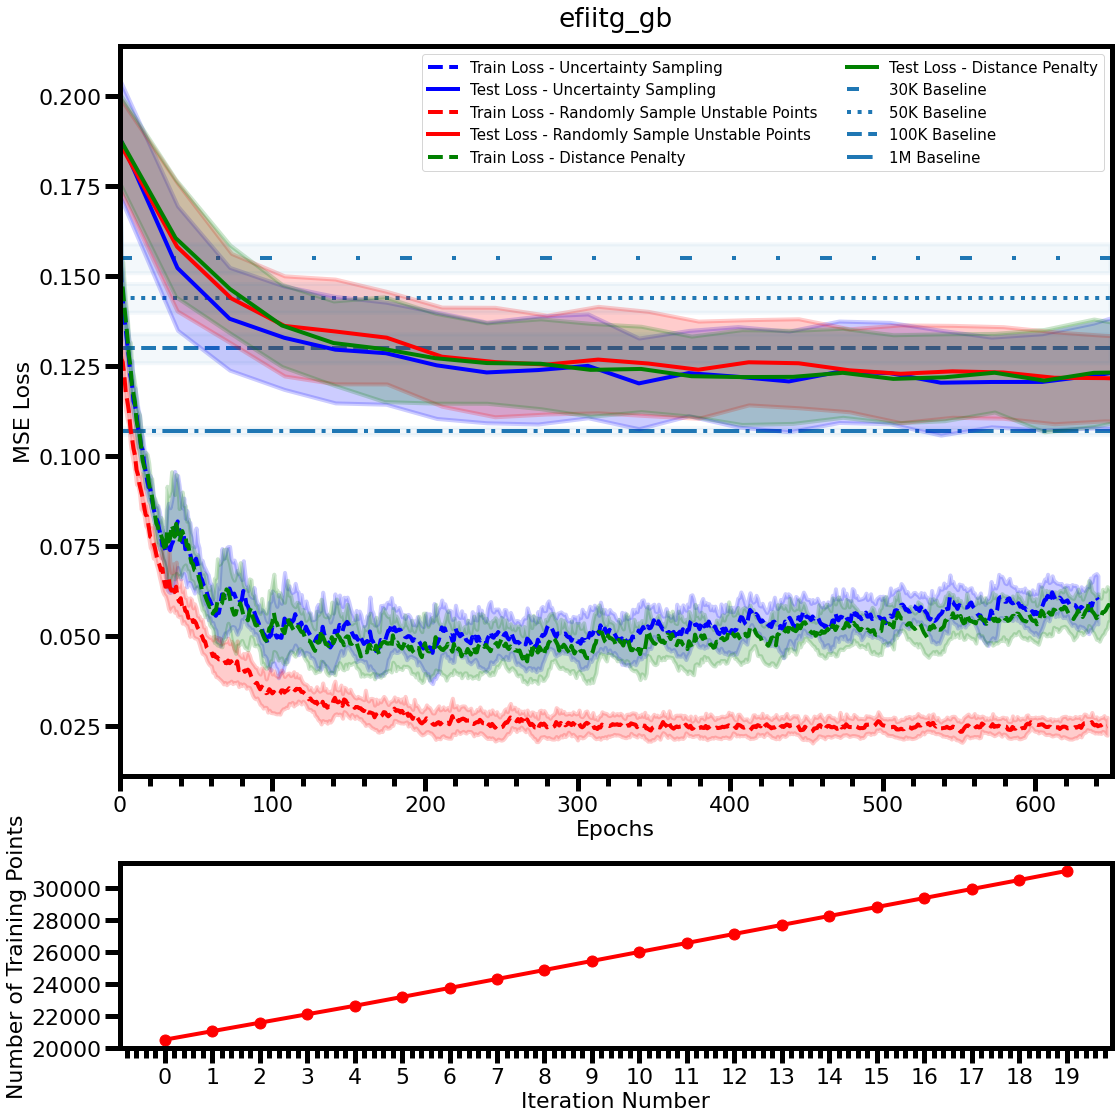

In [192]:
#plt.figure(constrained_layout= True, figsize = (12,8))
mosaic = """
    A
    A
    A
    B
"""

#fig = plt.figure(constrained_layout= True, figsize = (16,16))
fig = plt.figure()

ax_dict = fig.subplot_mosaic(mosaic)

x_max = 650


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_lead_av))),
    train_loss_1_lead_av - train_loss_1_lead_std,
    train_loss_1_lead_av + train_loss_1_lead_std,  
    alpha = 0.2,
    color = "blue",
    linewidth=4
    )
ax_dict["A"].plot(train_loss_1_lead_av, color = "blue", linestyle = "--", linewidth=4, label = "Train Loss - Uncertainty Sampling")


# ax_dict["A"].fill_between(
#     list(range(len(val_loss_1_lead_av))),
#     val_loss_1_lead_av - val_loss_1_lead_std,
#     val_loss_1_lead_av + val_loss_1_lead_std,
#     alpha = 0.2,
#     color = "orange",
#     linewidth=4
#     )
# ax_dict["A"].plot(val_loss_1_lead_av, color = "orange", linewidth=4, label = "Validation Loss - Uncertainty Sampling")

ax_dict["A"].fill_between(
    line_pos_1_lead_av,
    test_loss_1_lead_av - test_loss_1_lead_std,
    test_loss_1_lead_av + test_loss_1_lead_std,
    alpha = 0.2,
    color = "blue",
    linewidth=4
    )
ax_dict["A"].plot(
    line_pos_1_lead_av, 
    test_loss_1_lead_av, 
    color="blue", linewidth=4, 
    label = "Test Loss - Uncertainty Sampling",
    )


##########################################################################################################
##########################################################################################################


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_rand_av))),
    train_loss_1_rand_av - train_loss_1_rand_std,
    train_loss_1_rand_av + train_loss_1_rand_std,
    alpha = 0.2,
    color = "red",
    linewidth=4
    )
ax_dict["A"].plot(train_loss_1_rand_av, color = "red", linestyle = "--", linewidth=4, label = "Train Loss - Randomly Sample Unstable Points")


# ax_dict["A"].fill_between(
#     list(range(len(val_loss_1_rand_av))),
#     val_loss_1_rand_av - val_loss_1_rand_std,
#     val_loss_1_rand_av + val_loss_1_rand_std,
#     alpha = 0.2,
#     color = "magenta",
#     linewidth=4,
#     )
# ax_dict["A"].plot(val_loss_1_rand_av, color = "magenta", linewidth=4, label = "Validation Loss - Randomly Sample Unstable Points")

ax_dict["A"].fill_between(
    line_pos_1_rand_av,
    test_loss_1_rand_av - test_loss_1_rand_std,
    test_loss_1_rand_av + test_loss_1_rand_std,
    alpha = 0.2,
    color = "red",
    linewidth=4
    )
ax_dict["A"].plot(line_pos_1_rand_av,
                  test_loss_1_rand_av,
                  linewidth=4, color = "red",
                  label = "Test Loss - Randomly Sample Unstable Points",
                 )


##########################################################################################################
##########################################################################################################


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_dist_av))),
    train_loss_1_dist_av - train_loss_1_dist_std,
    train_loss_1_dist_av + train_loss_1_dist_std,
    alpha = 0.2,
    color = "green",
    linewidth=4
    )
ax_dict["A"].plot(train_loss_1_dist_av, color = "green", linestyle = "--", linewidth=4, label = "Train Loss - Distance Penalty")


# ax_dict["A"].fill_between(
#     list(range(len(val_loss_1_dist_av))),
#     val_loss_1_dist_av - val_loss_1_dist_std,
#     val_loss_1_dist_av + val_loss_1_dist_std,
#     color = "black",
#     alpha = 0.2,
#     linewidth=4,
#     )
# ax_dict["A"].plot(val_loss_1_dist_av, color = "black", linewidth=4, label = "Validation Loss - Distance Penalty")

ax_dict["A"].fill_between(
    line_pos_1_dist_av,
    test_loss_1_dist_av - test_loss_1_dist_std,
    test_loss_1_dist_av + test_loss_1_dist_std,
    alpha = 0.2,
    color = "green",
    linewidth=4,
    )
ax_dict["A"].plot(
    line_pos_1_dist_av,
    test_loss_1_dist_av,
    color = "green",
    linewidth=4,
    label = "Test Loss - Distance Penalty",
)


##########################################################################################################
##########################################################################################################


ax_dict["A"].axhline(y = 0.155, linestyle = (0, (3, 10, 1, 10, 1, 10)), linewidth=4, color = "tab:blue", label = "30K Baseline", zorder = -1) # Gotten from Average_Performance.ipynb
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.155 - 0.004,
    0.155 + 0.004,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4
    )

ax_dict["A"].axhline(y = 0.144, linestyle = "dotted", color = "tab:blue", linewidth=4, label = "50K Baseline", zorder = -1)
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.144 - 0.004,
    0.144 + 0.004,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4,
    )

ax_dict["A"].axhline(y = 0.130, linestyle = "dashed", color = "tab:blue", linewidth=4, label = "100K Baseline", zorder = -1)
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.130 - 0.004,
    0.130 + 0.004,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4,
    )

ax_dict["A"].axhline(y = 0.107, linestyle = "dashdot", color = "tab:blue", linewidth=4, label = "1M Baseline", zorder = -1) 
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.107 - 0.001,
    0.107 + 0.001,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4
    )



#ax_dict["A"].axhline(y = 85.6, linestyle = "dashed", color = "tab:blue", linewidth=4, label = "17M Baseline", zorder = -1)
# ax_dict["A"].fill_between(
#     list(range(350)),
#     87.5 - 1.2,
#     87.5 + 1.2,
#     alpha = 0.05,
#     color = "tab:blue",
#     linewidth=4,
#     )

ax_dict["A"].set_xlabel("Epochs")
ax_dict["A"].set_ylabel("MSE Loss")
ax_dict["A"].set_title("efiitg_gb")
ax_dict["A"].set_xlim(0, x_max)


#ax_dict["A"].legend(fontsize = 13)
ax_dict["A"].legend(ncol = 2, fontsize = 15)
#.legend(bbox_to_anchor=(1.04,1), loc="upper left")


ax_dict["B"].plot(np.mean(np.array(n_points_av), axis = 0), color = "red", marker = "o", linewidth=4, markersize = 11)
ax_dict["B"].set_xlabel("Iteration Number")
ax_dict["B"].set_ylabel("Number of Training Points")

ax_dict["B"].set_yticks(np.arange(20_000, np.max(n_points_av), 2_000));
ax_dict["B"].set_xticks(np.arange(0, iters, 1));

fig.tight_layout()


## Paper Results Two Fluxes

In [218]:
dict_lead = []
dict_rand = []
dict_dist = []
dict_add = []

iters = 9

for i in range(1,2):
    dict_lead_temp = []
    dict_rand_temp = []
    dict_dist_temp = []
    dict_add_temp = []
    

    for j in range(iters):
        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/two_fluxes_leading_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_lead_temp.append(pickle.load(f))

        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/two_fluxes_random_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_rand_temp.append(pickle.load(f))

        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/two_fluxes_dist_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_dist_temp.append(pickle.load(f))
            
        with open(f"/share/rcifdata/jbarr/UKAEAGroupProject/outputs/paper/two_fluxes_add_{i}/efiitg_gb/pipeline_outputs_lam_1_iteration_{j}.pkl", "rb") as f:
            dict_add_temp.append(pickle.load(f))
    
    dict_lead.append(dict_lead_temp)
    dict_rand.append(dict_rand_temp)
    dict_dist.append(dict_dist_temp)
    dict_add.append(dict_add_temp)

In [207]:
dict_lead[0][0].keys()

dict_keys(['train_loss_init', 'test_loss_init', 'test_loss_init_unscaled', 'retrain_losses', 'retrain_val_losses', 'retrain_losses_unscaled', 'retrain_val_losses_unscaled', 'post_test_loss', 'post_test_loss_unscaled', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'novel_uncert_before', 'novel_uncert_after', 'holdout_pred_before', 'holdout_pred_after', 'holdout_ground_truth', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

In [229]:
train_loss_1_lead = []
train_loss_2_lead = []

test_loss_1_lead = []
test_loss_2_lead = []

val_loss_1_lead = []
val_loss_2_lead = []

iter_length_1_lead = []
iter_length_2_lead = []
line_pos_1_lead = []
line_pos_2_lead = []


for j in range(len(dict_lead)):
    train_loss_1_lead_temp = []
    val_loss_1_lead_temp = []

    train_loss_2_lead_temp = []
    val_loss_2_lead_temp = []
    
    test_loss_1_lead_temp.append(dict_lead[j][0]["test_loss_init"][0])

    for i in range(iters):
        train_loss_1_lead_temp.append(dict_lead[j][i]["retrain_losses"][0][0])
        val_loss_1_lead_temp.append(dict_lead[j][i]["retrain_val_losses"][0][0])

        train_loss_2_lead_temp.append(dict_lead[j][i]["retrain_losses"][0][1])
        val_loss_2_lead_temp.append(dict_lead[j][i]["retrain_val_losses"][0][1])
        
        test_loss_1_lead_temp.append(dict_lead[j][i]["post_test_loss"][0][0])
        test_loss_2_lead_temp.append(dict_lead[j][i]["post_test_loss"][0][1])

    iter_length_1_lead_temp = [len(losslist) for losslist in train_loss_1_lead_temp]
    iter_length_2_lead_temp = [len(losslist) for losslist in train_loss_2_lead_temp]
    line_pos_1_lead_temp = np.cumsum(iter_length_1_lead_temp)
    line_pos_1_lead_temp = np.insert(line_pos_1_lead_temp,0,0) # append 0 to start
    
    line_pos_2_lead_temp = np.cumsum(iter_length_2_lead_temp)  
    line_pos_2_lead_temp = np.insert(line_pos_2_lead_temp,0,0) # append 0 to start

    train_losses_1_lead_temp = [loss for losslist in train_loss_1_lead_temp for loss in losslist]
    val_losses_1_lead_temp = [loss for losslist in val_loss_1_lead_temp for loss in losslist]

    train_losses_2_lead_temp = [loss for losslist in train_loss_2_lead_temp for loss in losslist]
    val_losses_2_lead_temp = [loss for losslist in val_loss_2_lead_temp for loss in losslist]
    
    
    train_loss_1_lead.append(train_losses_1_lead_temp)
    val_loss_1_lead.append(val_losses_1_lead_temp)
    
    train_loss_2_lead.append(train_losses_2_lead_temp)
    val_loss_2_lead.append(val_losses_2_lead_temp)
    
    iter_length_1_lead.append(iter_length_1_lead_temp)
    iter_length_2_lead.append(iter_length_2_lead_temp)
    
    line_pos_1_lead.append(line_pos_1_lead_temp)
    line_pos_2_lead.append(line_pos_2_lead_temp)
    

min_length_1 = np.inf
min_length_2 = np.inf
for i in range(len(train_loss_1_lead)):
    min_length_1 = min(len(train_loss_1_lead[i]), min_length_1)
    min_length_2 = min(len(train_loss_2_lead[i]), min_length_2)
    
for i in range(len(dict_lead)):
    train_loss_1_lead[i] = train_loss_1_lead[i][:min_length_1]
    train_loss_2_lead[i] = train_loss_2_lead[i][:min_length_2]
    
    val_loss_1_lead[i] = val_loss_1_lead[i][:min_length_1]
    val_loss_2_lead[i] = val_loss_2_lead[i][:min_length_2]
    
train_loss_1_lead_av = np.mean(np.array(train_loss_1_lead), axis = 0)
train_loss_1_lead_std = np.std(np.array(train_loss_1_lead), axis = 0)

val_loss_1_lead_av = np.mean(np.array(val_loss_1_lead), axis = 0)
val_loss_1_lead_std = np.std(np.array(val_loss_1_lead), axis = 0)

train_loss_2_lead_av = np.mean(np.array(train_loss_2_lead), axis = 0)
train_loss_2_lead_std = np.std(np.array(train_loss_2_lead), axis = 0)

val_loss_2_lead_av = np.mean(np.array(val_loss_2_lead), axis = 0)
val_loss_2_lead_std = np.std(np.array(val_loss_2_lead), axis = 0)

test_loss_2_lead_av = np.mean(np.array(test_loss_2_lead), axis = 0)
test_loss_2_lead_std = np.std(np.array(test_loss_2_lead), axis = 0)

line_pos_1_lead_av = np.mean(np.array(line_pos_1_lead), axis = 0)
line_pos_2_lead_av = np.mean(np.array(line_pos_2_lead), axis = 0)

/home/jbarr/.conda/envs/new_gp/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jbarr/.conda/envs/new_gp/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jbarr/.conda/envs/new_gp/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jbarr/.conda/envs/new_gp/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/jbarr/.conda/envs/new_gp/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [220]:
train_loss_1_rand = []
train_loss_2_rand = []

test_loss_1_rand = []
test_loss_2_rand = []

val_loss_1_rand = []
val_loss_2_rand = []

iter_length_1_rand = []
iter_length_2_rand = []
line_pos_1_rand = []
line_pos_2_rand = []


for j in range(len(dict_rand)):
    train_loss_1_rand_temp = []
    val_loss_1_rand_temp = []

    train_loss_2_rand_temp = []
    val_loss_2_rand_temp = []
    
    test_loss_1_rand_temp.append(dict_rand[j][0]["test_loss_init"][0])

    for i in range(iters):
        train_loss_1_rand_temp.append(dict_rand[j][i]["retrain_losses"][0][0])
        val_loss_1_rand_temp.append(dict_rand[j][i]["retrain_val_losses"][0][0])

        train_loss_2_rand_temp.append(dict_rand[j][i]["retrain_losses"][0][1])
        val_loss_2_rand_temp.append(dict_rand[j][i]["retrain_val_losses"][0][1])
        
        test_loss_1_rand_temp.append(dict_rand[j][i]["post_test_loss"][0][0])
        test_loss_2_rand_temp.append(dict_rand[j][i]["post_test_loss"][0][1])

    iter_length_1_rand_temp = [len(losslist) for losslist in train_loss_1_rand_temp]
    iter_length_2_rand_temp = [len(losslist) for losslist in train_loss_2_rand_temp]
    line_pos_1_rand_temp = np.cumsum(iter_length_1_rand_temp)
    line_pos_1_rand_temp = np.insert(line_pos_1_rand_temp,0,0) # append 0 to start
    
    line_pos_2_rand_temp = np.cumsum(iter_length_2_rand_temp)  
    line_pos_2_rand_temp = np.insert(line_pos_2_rand_temp,0,0) # append 0 to start

    train_losses_1_rand_temp = [loss for losslist in train_loss_1_rand_temp for loss in losslist]
    val_losses_1_rand_temp = [loss for losslist in val_loss_1_rand_temp for loss in losslist]

    train_losses_2_rand_temp = [loss for losslist in train_loss_2_rand_temp for loss in losslist]
    val_losses_2_rand_temp = [loss for losslist in val_loss_2_rand_temp for loss in losslist]
    
    
    train_loss_1_rand.append(train_losses_1_rand_temp)
    val_loss_1_rand.append(val_losses_1_rand_temp)
    
    train_loss_2_rand.append(train_losses_2_rand_temp)
    val_loss_2_rand.append(val_losses_2_rand_temp)
    
    iter_length_1_rand.append(iter_length_1_rand_temp)
    iter_length_2_rand.append(iter_length_2_rand_temp)
    
    line_pos_1_rand.append(line_pos_1_rand_temp)
    line_pos_2_rand.append(line_pos_2_rand_temp)
    

min_length_1 = np.inf
min_length_2 = np.inf
for i in range(len(train_loss_1_rand)):
    min_length_1 = min(len(train_loss_1_rand[i]), min_length_1)
    min_length_2 = min(len(train_loss_2_rand[i]), min_length_2)
    
for i in range(len(dict_rand)):
    train_loss_1_rand[i] = train_loss_1_rand[i][:min_length_1]
    train_loss_2_rand[i] = train_loss_2_rand[i][:min_length_2]
    
    val_loss_1_rand[i] = val_loss_1_rand[i][:min_length_1]
    val_loss_2_rand[i] = val_loss_2_rand[i][:min_length_2]
    
train_loss_1_rand_av = np.mean(np.array(train_loss_1_rand), axis = 0)
train_loss_1_rand_std = np.std(np.array(train_loss_1_rand), axis = 0)

val_loss_1_rand_av = np.mean(np.array(val_loss_1_rand), axis = 0)
val_loss_1_rand_std = np.std(np.array(val_loss_1_rand), axis = 0)

train_loss_2_rand_av = np.mean(np.array(train_loss_2_rand), axis = 0)
train_loss_2_rand_std = np.std(np.array(train_loss_2_rand), axis = 0)

val_loss_2_rand_av = np.mean(np.array(val_loss_2_rand), axis = 0)
val_loss_2_rand_std = np.std(np.array(val_loss_2_rand), axis = 0)

test_loss_2_rand_av = np.mean(np.array(test_loss_2_rand), axis = 0)
test_loss_2_rand_std = np.std(np.array(test_loss_2_rand), axis = 0)

line_pos_1_rand_av = np.mean(np.array(line_pos_1_rand), axis = 0)
line_pos_2_rand_av = np.mean(np.array(line_pos_2_rand), axis = 0)

In [221]:
train_loss_1_dist = []
train_loss_2_dist = []

test_loss_1_dist = []
test_loss_2_dist = []

val_loss_1_dist = []
val_loss_2_dist = []

iter_length_1_dist = []
iter_length_2_dist = []
line_pos_1_dist = []
line_pos_2_dist = []


for j in range(len(dict_dist)):
    train_loss_1_dist_temp = []
    val_loss_1_dist_temp = []

    train_loss_2_dist_temp = []
    val_loss_2_dist_temp = []
    
    test_loss_1_dist_temp.append(dict_dist[j][0]["test_loss_init"][0])

    for i in range(iters):
        train_loss_1_dist_temp.append(dict_dist[j][i]["retrain_losses"][0][0])
        val_loss_1_dist_temp.append(dict_dist[j][i]["retrain_val_losses"][0][0])

        train_loss_2_dist_temp.append(dict_dist[j][i]["retrain_losses"][0][1])
        val_loss_2_dist_temp.append(dict_dist[j][i]["retrain_val_losses"][0][1])
        
        test_loss_1_dist_temp.append(dict_dist[j][i]["post_test_loss"][0][0])
        test_loss_2_dist_temp.append(dict_dist[j][i]["post_test_loss"][0][1])

    iter_length_1_dist_temp = [len(losslist) for losslist in train_loss_1_dist_temp]
    iter_length_2_dist_temp = [len(losslist) for losslist in train_loss_2_dist_temp]
    line_pos_1_dist_temp = np.cumsum(iter_length_1_dist_temp)
    line_pos_1_dist_temp = np.insert(line_pos_1_dist_temp,0,0) # append 0 to start
    
    line_pos_2_dist_temp = np.cumsum(iter_length_2_dist_temp)  
    line_pos_2_dist_temp = np.insert(line_pos_2_dist_temp,0,0) # append 0 to start

    train_losses_1_dist_temp = [loss for losslist in train_loss_1_dist_temp for loss in losslist]
    val_losses_1_dist_temp = [loss for losslist in val_loss_1_dist_temp for loss in losslist]

    train_losses_2_dist_temp = [loss for losslist in train_loss_2_dist_temp for loss in losslist]
    val_losses_2_dist_temp = [loss for losslist in val_loss_2_dist_temp for loss in losslist]
    
    
    train_loss_1_dist.append(train_losses_1_dist_temp)
    val_loss_1_dist.append(val_losses_1_dist_temp)
    
    train_loss_2_dist.append(train_losses_2_dist_temp)
    val_loss_2_dist.append(val_losses_2_dist_temp)
    
    iter_length_1_dist.append(iter_length_1_dist_temp)
    iter_length_2_dist.append(iter_length_2_dist_temp)
    
    line_pos_1_dist.append(line_pos_1_dist_temp)
    line_pos_2_dist.append(line_pos_2_dist_temp)
    

min_length_1 = np.inf
min_length_2 = np.inf
for i in range(len(train_loss_1_dist)):
    min_length_1 = min(len(train_loss_1_dist[i]), min_length_1)
    min_length_2 = min(len(train_loss_2_dist[i]), min_length_2)
    
for i in range(len(dict_dist)):
    train_loss_1_dist[i] = train_loss_1_dist[i][:min_length_1]
    train_loss_2_dist[i] = train_loss_2_dist[i][:min_length_2]
    
    val_loss_1_dist[i] = val_loss_1_dist[i][:min_length_1]
    val_loss_2_dist[i] = val_loss_2_dist[i][:min_length_2]
    
train_loss_1_dist_av = np.mean(np.array(train_loss_1_dist), axis = 0)
train_loss_1_dist_std = np.std(np.array(train_loss_1_dist), axis = 0)

val_loss_1_dist_av = np.mean(np.array(val_loss_1_dist), axis = 0)
val_loss_1_dist_std = np.std(np.array(val_loss_1_dist), axis = 0)

train_loss_2_dist_av = np.mean(np.array(train_loss_2_dist), axis = 0)
train_loss_2_dist_std = np.std(np.array(train_loss_2_dist), axis = 0)

val_loss_2_dist_av = np.mean(np.array(val_loss_2_dist), axis = 0)
val_loss_2_dist_std = np.std(np.array(val_loss_2_dist), axis = 0)

test_loss_2_dist_av = np.mean(np.array(test_loss_2_dist), axis = 0)
test_loss_2_dist_std = np.std(np.array(test_loss_2_dist), axis = 0)

line_pos_1_dist_av = np.mean(np.array(line_pos_1_dist), axis = 0)
line_pos_2_dist_av = np.mean(np.array(line_pos_2_dist), axis = 0)

In [222]:
train_loss_1_add = []
train_loss_2_add = []

test_loss_1_add = []
test_loss_2_add = []

val_loss_1_add = []
val_loss_2_add = []

iter_length_1_add = []
iter_length_2_add = []
line_pos_1_add = []
line_pos_2_add = []


for j in range(len(dict_add)):
    train_loss_1_add_temp = []
    val_loss_1_add_temp = []

    train_loss_2_add_temp = []
    val_loss_2_add_temp = []
    
    test_loss_1_add_temp.append(dict_add[j][0]["test_loss_init"][0])

    for i in range(iters):
        train_loss_1_add_temp.append(dict_add[j][i]["retrain_losses"][0][0])
        val_loss_1_add_temp.append(dict_add[j][i]["retrain_val_losses"][0][0])

        train_loss_2_add_temp.append(dict_add[j][i]["retrain_losses"][0][1])
        val_loss_2_add_temp.append(dict_add[j][i]["retrain_val_losses"][0][1])
        
        test_loss_1_add_temp.append(dict_add[j][i]["post_test_loss"][0][0])
        test_loss_2_add_temp.append(dict_add[j][i]["post_test_loss"][0][1])

    iter_length_1_add_temp = [len(losslist) for losslist in train_loss_1_add_temp]
    iter_length_2_add_temp = [len(losslist) for losslist in train_loss_2_add_temp]
    line_pos_1_add_temp = np.cumsum(iter_length_1_add_temp)
    line_pos_1_add_temp = np.insert(line_pos_1_add_temp,0,0) # append 0 to start
    
    line_pos_2_add_temp = np.cumsum(iter_length_2_add_temp)  
    line_pos_2_add_temp = np.insert(line_pos_2_add_temp,0,0) # append 0 to start

    train_losses_1_add_temp = [loss for losslist in train_loss_1_add_temp for loss in losslist]
    val_losses_1_add_temp = [loss for losslist in val_loss_1_add_temp for loss in losslist]

    train_losses_2_add_temp = [loss for losslist in train_loss_2_add_temp for loss in losslist]
    val_losses_2_add_temp = [loss for losslist in val_loss_2_add_temp for loss in losslist]
    
    
    train_loss_1_add.append(train_losses_1_add_temp)
    val_loss_1_add.append(val_losses_1_add_temp)
    
    train_loss_2_add.append(train_losses_2_add_temp)
    val_loss_2_add.append(val_losses_2_add_temp)
    
    iter_length_1_add.append(iter_length_1_add_temp)
    iter_length_2_add.append(iter_length_2_add_temp)
    
    line_pos_1_add.append(line_pos_1_add_temp)
    line_pos_2_add.append(line_pos_2_add_temp)
    

min_length_1 = np.inf
min_length_2 = np.inf
for i in range(len(train_loss_1_add)):
    min_length_1 = min(len(train_loss_1_add[i]), min_length_1)
    min_length_2 = min(len(train_loss_2_add[i]), min_length_2)
    
for i in range(len(dict_add)):
    train_loss_1_add[i] = train_loss_1_add[i][:min_length_1]
    train_loss_2_add[i] = train_loss_2_add[i][:min_length_2]
    
    val_loss_1_add[i] = val_loss_1_add[i][:min_length_1]
    val_loss_2_add[i] = val_loss_2_add[i][:min_length_2]
    
train_loss_1_add_av = np.mean(np.array(train_loss_1_add), axis = 0)
train_loss_1_add_std = np.std(np.array(train_loss_1_add), axis = 0)

val_loss_1_add_av = np.mean(np.array(val_loss_1_add), axis = 0)
val_loss_1_add_std = np.std(np.array(val_loss_1_add), axis = 0)

train_loss_2_add_av = np.mean(np.array(train_loss_2_add), axis = 0)
train_loss_2_add_std = np.std(np.array(train_loss_2_add), axis = 0)

val_loss_2_add_av = np.mean(np.array(val_loss_2_add), axis = 0)
val_loss_2_add_std = np.std(np.array(val_loss_2_add), axis = 0)

test_loss_2_add_av = np.mean(np.array(test_loss_2_add), axis = 0)
test_loss_2_add_std = np.std(np.array(test_loss_2_add), axis = 0)

line_pos_1_add_av = np.mean(np.array(line_pos_1_add), axis = 0)
line_pos_2_add_av = np.mean(np.array(line_pos_2_add), axis = 0)

ValueError: operands could not be broadcast together with shapes (10,) (489,) 

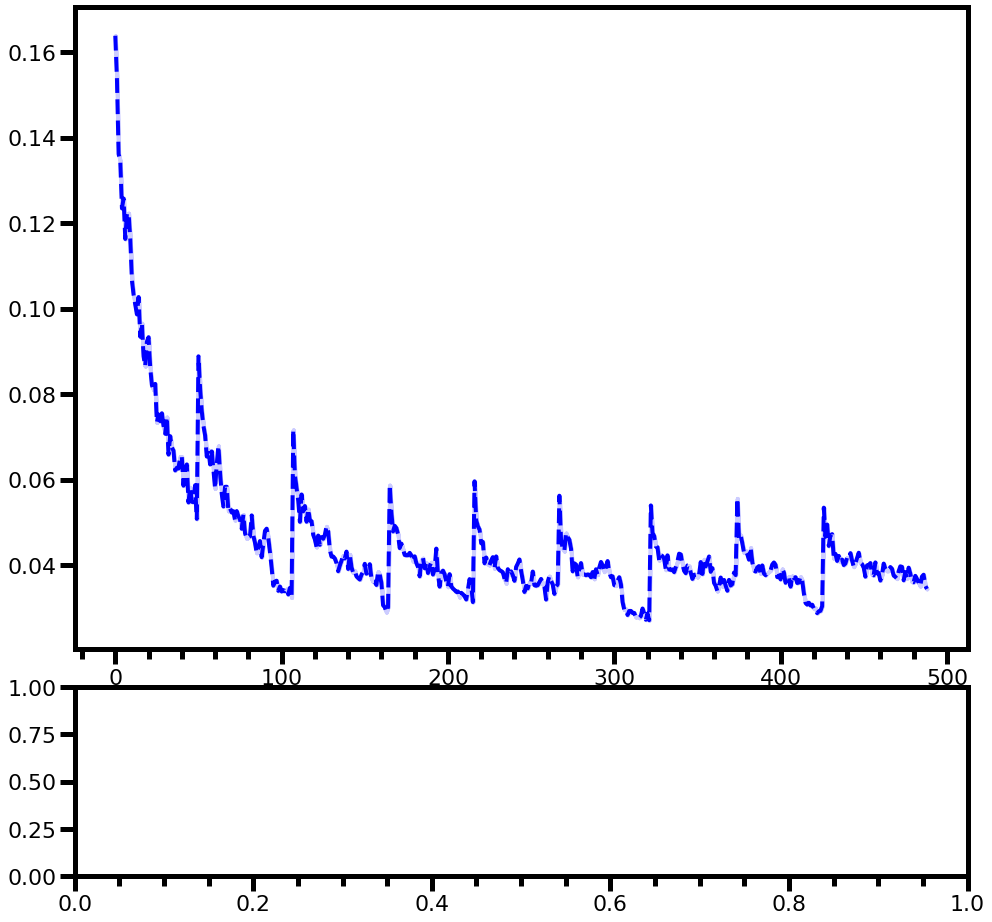

In [223]:
#plt.figure(constrained_layout= True, figsize = (12,8))
mosaic = """
    A
    A
    A
    B
"""

#fig = plt.figure(constrained_layout= True, figsize = (16,16))
fig = plt.figure()

ax_dict = fig.subplot_mosaic(mosaic)

x_max = 650


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_lead_av))),
    train_loss_1_lead_av - train_loss_1_lead_std,
    train_loss_1_lead_av + train_loss_1_lead_std,  
    alpha = 0.2,
    color = "blue",
    linewidth=4
    )
ax_dict["A"].plot(train_loss_1_lead_av, color = "blue", linestyle = "--", linewidth=4, label = "Train Loss - Leading Flux Uncertainty")


# ax_dict["A"].fill_between(
#     list(range(len(val_loss_1_lead_av))),
#     val_loss_1_lead_av - val_loss_1_lead_std,
#     val_loss_1_lead_av + val_loss_1_lead_std,
#     alpha = 0.2,
#     color = "orange",
#     linewidth=4
#     )
# ax_dict["A"].plot(val_loss_1_lead_av, color = "orange", linewidth=4, label = "Validation Loss - Uncertainty Sampling")

ax_dict["A"].fill_between(
    line_pos_1_lead_av,
    test_loss_1_lead_av - test_loss_1_lead_std,
    test_loss_1_lead_av + test_loss_1_lead_std,
    alpha = 0.2,
    color = "magenta",
    linewidth=4
    )
ax_dict["A"].plot(
    line_pos_1_lead_av, 
    test_loss_1_lead_av, 
    color="magenta", linewidth=4, 
    label = "Test Loss - Leading Flux Uncertainty",
    )


##########################################################################################################
##########################################################################################################

ax_dict["A"].fill_between(
    list(range(len(train_loss_1_lead_av))),
    train_loss_1_add_av - train_loss_1_add_std,
    train_loss_1_add_av + train_loss_1_add_std,  
    alpha = 0.2,
    color = "magenta",
    linewidth=4
    )
ax_dict["A"].plot(train_loss_1_add_av, color = "blue", linestyle = "--", linewidth=4, label = "Train Loss - Add Uncertainties")


ax_dict["A"].fill_between(
    line_pos_1_add_av,
    test_loss_1_add_av - test_loss_1_add_std,
    test_loss_1_add_av + test_loss_1_add_std,
    alpha = 0.2,
    color = "magenta",
    linewidth=4
    )
ax_dict["A"].plot(
    line_pos_1_add_av, 
    test_loss_1_add_av, 
    color="magenta", linewidth=4, 
    label = "Test Loss - Add Uncertainties",
    )



##########################################################################################################
##########################################################################################################


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_rand_av))),
    train_loss_1_rand_av - train_loss_1_rand_std,
    train_loss_1_rand_av + train_loss_1_rand_std,
    alpha = 0.2,
    color = "red",
    linewidth=4
    )
ax_dict["A"].plot(train_loss_1_rand_av, color = "red", linestyle = "--", linewidth=4, label = "Train Loss - Randomly Sample Unstable Points")


# ax_dict["A"].fill_between(
#     list(range(len(val_loss_1_rand_av))),
#     val_loss_1_rand_av - val_loss_1_rand_std,
#     val_loss_1_rand_av + val_loss_1_rand_std,
#     alpha = 0.2,
#     color = "magenta",
#     linewidth=4,
#     )
# ax_dict["A"].plot(val_loss_1_rand_av, color = "magenta", linewidth=4, label = "Validation Loss - Randomly Sample Unstable Points")

ax_dict["A"].fill_between(
    line_pos_1_rand_av,
    test_loss_1_rand_av - test_loss_1_rand_std,
    test_loss_1_rand_av + test_loss_1_rand_std,
    alpha = 0.2,
    color = "red",
    linewidth=4
    )
ax_dict["A"].plot(line_pos_1_rand_av,
                  test_loss_1_rand_av,
                  linewidth=4, color = "red",
                  label = "Test Loss - Randomly Sample Unstable Points",
                 )


##########################################################################################################
##########################################################################################################


ax_dict["A"].fill_between(
    list(range(len(train_loss_1_dist_av))),
    train_loss_1_dist_av - train_loss_1_dist_std,
    train_loss_1_dist_av + train_loss_1_dist_std,
    alpha = 0.2,
    color = "green",
    linewidth=4
    )
ax_dict["A"].plot(train_loss_1_dist_av, color = "green", linestyle = "--", linewidth=4, label = "Train Loss - Distance Penalty")


# ax_dict["A"].fill_between(
#     list(range(len(val_loss_1_dist_av))),
#     val_loss_1_dist_av - val_loss_1_dist_std,
#     val_loss_1_dist_av + val_loss_1_dist_std,
#     color = "black",
#     alpha = 0.2,
#     linewidth=4,
#     )
# ax_dict["A"].plot(val_loss_1_dist_av, color = "black", linewidth=4, label = "Validation Loss - Distance Penalty")

ax_dict["A"].fill_between(
    line_pos_1_dist_av,
    test_loss_1_dist_av - test_loss_1_dist_std,
    test_loss_1_dist_av + test_loss_1_dist_std,
    alpha = 0.2,
    color = "green",
    linewidth=4,
    )
ax_dict["A"].plot(
    line_pos_1_dist_av,
    test_loss_1_dist_av,
    color = "green",
    linewidth=4,
    label = "Test Loss - Distance Penalty",
)


##########################################################################################################
##########################################################################################################


ax_dict["A"].axhline(y = 0.155, linestyle = (0, (3, 10, 1, 10, 1, 10)), linewidth=4, color = "tab:blue", label = "30K Baseline", zorder = -1) # Gotten from Average_Performance.ipynb
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.155 - 0.004,
    0.155 + 0.004,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4
    )

ax_dict["A"].axhline(y = 0.144, linestyle = "dotted", color = "tab:blue", linewidth=4, label = "50K Baseline", zorder = -1)
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.144 - 0.004,
    0.144 + 0.004,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4,
    )

ax_dict["A"].axhline(y = 0.130, linestyle = "dashed", color = "tab:blue", linewidth=4, label = "100K Baseline", zorder = -1)
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.130 - 0.004,
    0.130 + 0.004,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4,
    )

ax_dict["A"].axhline(y = 0.107, linestyle = "dashdot", color = "tab:blue", linewidth=4, label = "1M Baseline", zorder = -1) 
ax_dict["A"].fill_between(
    list(range(x_max)),
    0.107 - 0.001,
    0.107 + 0.001,
    alpha = 0.05,
    color = "tab:blue",
    linewidth=4
    )



#ax_dict["A"].axhline(y = 85.6, linestyle = "dashed", color = "tab:blue", linewidth=4, label = "17M Baseline", zorder = -1)
# ax_dict["A"].fill_between(
#     list(range(350)),
#     87.5 - 1.2,
#     87.5 + 1.2,
#     alpha = 0.05,
#     color = "tab:blue",
#     linewidth=4,
#     )

ax_dict["A"].set_xlabel("Epochs")
ax_dict["A"].set_ylabel("MSE Loss")
ax_dict["A"].set_title("efiitg_gb")
ax_dict["A"].set_xlim(0, x_max)


#ax_dict["A"].legend(fontsize = 13)
ax_dict["A"].legend(ncol = 2, fontsize = 15)
#.legend(bbox_to_anchor=(1.04,1), loc="upper left")


ax_dict["B"].plot(np.mean(np.array(n_points_av), axis = 0), color = "red", marker = "o", linewidth=4, markersize = 11)
ax_dict["B"].set_xlabel("Iteration Number")
ax_dict["B"].set_ylabel("Number of Training Points")

ax_dict["B"].set_yticks(np.arange(20_000, np.max(n_points_av), 2_000));
ax_dict["B"].set_xticks(np.arange(0, iters, 1));

fig.tight_layout()


In [224]:
line_pos_1_lead_av

array([  0.,  50., 107., 165., 216., 267., 322., 374., 426., 489.])